In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = '/Users/pushpanb/Downloads/OpenResearch/Fault and rainfall data.xlsx'
dfs = pd.read_excel(file_path,sheet_name=['Fault Data', 'Rainfall','Calendar Lookup'])
df_faults = dfs['Fault Data']
df_rainfall = dfs['Rainfall']
df_calender = dfs['Calendar Lookup']

In [4]:
df_faults.head(10)

Fault ID REPORT_DATE INITIAL_MFL
0  ID000001  2014-01-01          CE
1  ID000002  2014-01-01          CA
2  ID000003  2014-01-01       OTHER
3  ID000004  2014-01-01          OK
4  ID000005  2014-01-01          LN
5  ID000006  2014-01-01          LN
6  ID000007  2014-01-01          CE
7  ID000008  2014-01-01          CE
8  ID000009  2014-01-01          LN
9  ID000010  2014-01-01          OK

In [5]:
df_rainfall.head(10)

OBSERVATION_DATE  RAINFALL_MM
0       2014-01-01         10.6
1       2014-01-02          4.2
2       2014-01-03          5.8
3       2014-01-04          1.8
4       2014-01-05         11.0
5       2014-01-06          5.6
6       2014-01-07          5.9
7       2014-01-08         14.8
8       2014-01-09          0.8
9       2014-01-10          5.2

In [6]:
df_calender.head(10)

Actual Date Day of Week  Day Num Cal Week  Day Num Cal Month  \
0  2014-01-01   Wednesday                 2                  1   
1  2014-01-02    Thursday                 3                  2   
2  2014-01-03      Friday                 4                  3   
3  2014-01-04    Saturday                 5                  4   
4  2014-01-05      Sunday                 6                  5   
5  2014-01-06      Monday                 7                  6   
6  2014-01-07     Tuesday                 1                  7   
7  2014-01-08   Wednesday                 2                  8   
8  2014-01-09    Thursday                 3                  9   
9  2014-01-10      Friday                 4                 10   

   Day Num Cal Year Bank Holiday  
0                 1            Y  
1                 2            N  
2                 3            N  
3                 4            N  
4                 5            N  
5                 6            N  
6                 7            N  
7                 8            N  
8                 9            N  
9                10            N

In [7]:
df_faults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275591 entries, 0 to 275590
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Fault ID     275591 non-null  object        
 1   REPORT_DATE  275591 non-null  datetime64[ns]
 2   INITIAL_MFL  275591 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 6.3+ MB


In [8]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OBSERVATION_DATE  1185 non-null   datetime64[ns]
 1   RAINFALL_MM       1185 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.6 KB


In [9]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Actual Date        1186 non-null   datetime64[ns]
 1   Day of Week        1186 non-null   object        
 2   Day Num Cal Week   1186 non-null   int64         
 3   Day Num Cal Month  1186 non-null   int64         
 4   Day Num Cal Year   1186 non-null   int64         
 5   Bank Holiday       1186 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 55.7+ KB


In [10]:
df_faults['REPORT_DATE'] = pd.to_datetime(df_faults['REPORT_DATE'])

In [11]:
df_faults_rainfall = pd.merge(df_faults,df_rainfall, left_on='REPORT_DATE',right_on='OBSERVATION_DATE',how='left')
df_faults_rainfall.head()

Fault ID REPORT_DATE INITIAL_MFL OBSERVATION_DATE  RAINFALL_MM
0  ID000001  2014-01-01          CE       2014-01-01         10.6
1  ID000002  2014-01-01          CA       2014-01-01         10.6
2  ID000003  2014-01-01       OTHER       2014-01-01         10.6
3  ID000004  2014-01-01          OK       2014-01-01         10.6
4  ID000005  2014-01-01          LN       2014-01-01         10.6

In [13]:
df_data = pd.merge(df_faults_rainfall,df_calender,left_on='REPORT_DATE',right_on='Actual Date',how='left')
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL OBSERVATION_DATE  RAINFALL_MM Actual Date  \
0  ID000001  2014-01-01          CE       2014-01-01         10.6  2014-01-01   
1  ID000002  2014-01-01          CA       2014-01-01         10.6  2014-01-01   
2  ID000003  2014-01-01       OTHER       2014-01-01         10.6  2014-01-01   
3  ID000004  2014-01-01          OK       2014-01-01         10.6  2014-01-01   
4  ID000005  2014-01-01          LN       2014-01-01         10.6  2014-01-01   

  Day of Week  Day Num Cal Week  Day Num Cal Month  Day Num Cal Year  \
0   Wednesday                 2                  1                 1   
1   Wednesday                 2                  1                 1   
2   Wednesday                 2                  1                 1   
3   Wednesday                 2                  1                 1   
4   Wednesday                 2                  1                 1   

  Bank Holiday  
0            Y  
1            Y  
2            Y  
3            Y  
4            Y

In [14]:
df_data.drop(columns=['OBSERVATION_DATE','Actual Date'],inplace=True)

In [15]:
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000002  2014-01-01          CA         10.6   Wednesday   
2  ID000003  2014-01-01       OTHER         10.6   Wednesday   
3  ID000004  2014-01-01          OK         10.6   Wednesday   
4  ID000005  2014-01-01          LN         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  
0                 2                  1                 1            Y  
1                 2                  1                 1            Y  
2                 2                  1                 1            Y  
3                 2                  1                 1            Y  
4                 2                  1                 1            Y

In [178]:
df_data.isnull().sum()

Fault ID               0
REPORT_DATE            0
INITIAL_MFL            0
RAINFALL_MM          604
Day of Week            0
Day Num Cal Week       0
Day Num Cal Month      0
Day Num Cal Year       0
Bank Holiday           0
dtype: int64

In [16]:
df = df_data.copy()

In [179]:
df_data.count()

Fault ID             275884
REPORT_DATE          275884
INITIAL_MFL          275884
RAINFALL_MM          275280
Day of Week          275884
Day Num Cal Week     275884
Day Num Cal Month    275884
Day Num Cal Year     275884
Bank Holiday         275884
dtype: int64

In [180]:
df_faults.count()

Fault ID       275591
REPORT_DATE    275591
INITIAL_MFL    275591
dtype: int64

In [181]:
df_data.RAINFALL_MM.count()

275280

In [182]:
df = df_data.copy()
df.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000002  2014-01-01          CA         10.6   Wednesday   
2  ID000003  2014-01-01       OTHER         10.6   Wednesday   
3  ID000004  2014-01-01          OK         10.6   Wednesday   
4  ID000005  2014-01-01          LN         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  
0                 2                  1                 1            Y  
1                 2                  1                 1            Y  
2                 2                  1                 1            Y  
3                 2                  1                 1            Y  
4                 2                  1                 1            Y

Text(0.5, 1.0, 'Histogram of Rainfall in (mm)')

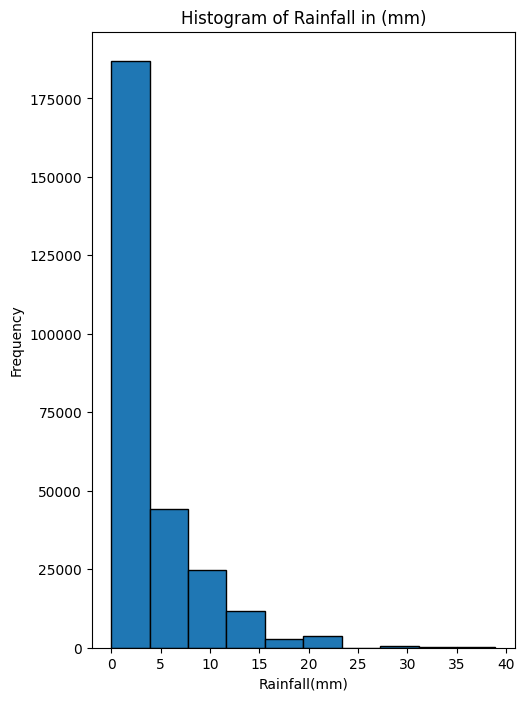

In [183]:
plt.figure(figsize=(12,8))

#Histogram

plt.subplot(1,2,1)
plt.hist(df['RAINFALL_MM'].dropna(),bins=10,edgecolor='k')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Rainfall in (mm)')


Text(0.5, 1.0, 'Boxplot of Rainfall (mm)')

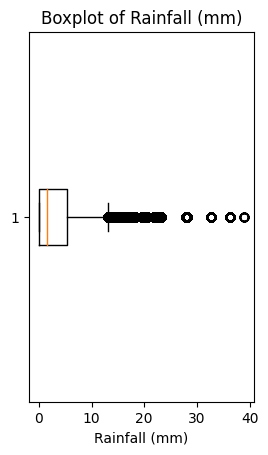

In [184]:
# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['RAINFALL_MM'].dropna(), vert=False)
plt.xlabel('Rainfall (mm)')
plt.title('Boxplot of Rainfall (mm)')

In [185]:
# Statistical Measure
skewness = df['RAINFALL_MM'].skew()
print(f'Skewness: {skewness}')

Skewness: 2.1829109502906734


**rainfall data is Positively skewed indicates a right-skewed distribution, so it's better to replace the missing value with mediam values.**

In [186]:
df_data['RAINFALL_MM'].fillna(df_data['RAINFALL_MM'].median(),inplace=True)
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000002  2014-01-01          CA         10.6   Wednesday   
2  ID000003  2014-01-01       OTHER         10.6   Wednesday   
3  ID000004  2014-01-01          OK         10.6   Wednesday   
4  ID000005  2014-01-01          LN         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  
0                 2                  1                 1            Y  
1                 2                  1                 1            Y  
2                 2                  1                 1            Y  
3                 2                  1                 1            Y  
4                 2                  1                 1            Y

In [187]:
df_data.isnull().sum()

Fault ID             0
REPORT_DATE          0
INITIAL_MFL          0
RAINFALL_MM          0
Day of Week          0
Day Num Cal Week     0
Day Num Cal Month    0
Day Num Cal Year     0
Bank Holiday         0
dtype: int64

In [188]:
df_data.duplicated().sum()

0

In [189]:
df_data.describe()

REPORT_DATE    RAINFALL_MM  Day Num Cal Week  \
count                         275884  275884.000000     275884.000000   
mean   2015-08-17 00:52:22.398978816       3.567204          3.749174   
min              2014-01-01 00:00:00       0.000000          1.000000   
25%              2014-10-22 00:00:00       0.200000          2.000000   
50%              2015-08-25 00:00:00       1.600000          3.000000   
75%              2016-06-16 00:00:00       5.300000          5.000000   
max              2017-03-31 00:00:00      38.900000          7.000000   
std                              NaN       4.812136          2.055005   

       Day Num Cal Month  Day Num Cal Year  
count      275884.000000     275884.000000  
mean           15.609517        169.051518  
min             1.000000          1.000000  
25%             8.000000         66.000000  
50%            15.000000        163.000000  
75%            23.000000        267.000000  
max            31.000000        366.000000  
std             8.695200        109.959719

In [190]:
count_zero_rainfall = df_data[df_data['RAINFALL_MM'] == 0].shape[0]
print(count_zero_rainfall)

47646


In [191]:
count_rainfall = df_data[df_data['RAINFALL_MM'] != 0].shape[0]
print(count_rainfall)

228238


In [192]:
df.nunique()

Fault ID             275591
REPORT_DATE            1186
INITIAL_MFL               7
RAINFALL_MM             168
Day of Week               7
Day Num Cal Week          7
Day Num Cal Month        31
Day Num Cal Year        366
Bank Holiday              2
dtype: int64

**Calculating the faults per day column**

In [193]:
# Group by REPORT_DATE and count the number of faults reported each day
Faults_per_Day = df_data.groupby('REPORT_DATE').size().reset_index(name='Faults_per_Day')
Faults_per_Day

REPORT_DATE  Faults_per_Day
0     2014-01-01             146
1     2014-01-02             337
2     2014-01-03             354
3     2014-01-04             182
4     2014-01-05             131
...          ...             ...
1181  2017-03-27             259
1182  2017-03-28             240
1183  2017-03-29             288
1184  2017-03-30             295
1185  2017-03-31             271

[1186 rows x 2 columns]

In [194]:
df_data = df_data.merge(Faults_per_Day,on='REPORT_DATE',how='left')
df_data.head(15)

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0   ID000001  2014-01-01          CE         10.6   Wednesday   
1   ID000002  2014-01-01          CA         10.6   Wednesday   
2   ID000003  2014-01-01       OTHER         10.6   Wednesday   
3   ID000004  2014-01-01          OK         10.6   Wednesday   
4   ID000005  2014-01-01          LN         10.6   Wednesday   
5   ID000006  2014-01-01          LN         10.6   Wednesday   
6   ID000007  2014-01-01          CE         10.6   Wednesday   
7   ID000008  2014-01-01          CE         10.6   Wednesday   
8   ID000009  2014-01-01          LN         10.6   Wednesday   
9   ID000010  2014-01-01          OK         10.6   Wednesday   
10  ID000011  2014-01-01          LN         10.6   Wednesday   
11  ID000012  2014-01-01          OK         10.6   Wednesday   
12  ID000013  2014-01-01       OTHER         10.6   Wednesday   
13  ID000014  2014-01-01          OK         10.6   Wednesday   
14  ID000015  2014-01-01       OTHER         10.6   Wednesday   

    Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
0                  2                  1                 1            Y   
1                  2                  1                 1            Y   
2                  2                  1                 1            Y   
3                  2                  1                 1            Y   
4                  2                  1                 1            Y   
5                  2                  1                 1            Y   
6                  2                  1                 1            Y   
7                  2                  1                 1            Y   
8                  2                  1                 1            Y   
9                  2                  1                 1            Y   
10                 2                  1                 1            Y   
11                 2                  1                 1            Y   
12                 2                  1                 1            Y   
13                 2                  1                 1            Y   
14                 2                  1                 1            Y   

    Faults_per_Day  
0              146  
1              146  
2              146  
3              146  
4              146  
5              146  
6              146  
7              146  
8              146  
9              146  
10             146  
11             146  
12             146  
13             146  
14             146

In [195]:
df_data.set_index('REPORT_DATE',inplace=True)

<Axes: xlabel='REPORT_DATE'>

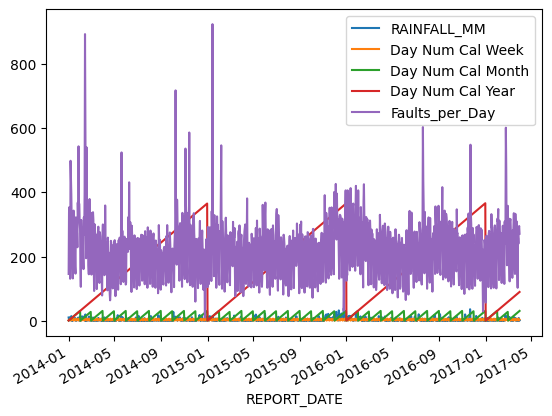

In [196]:
df_data.plot()

In [197]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [137]:
test_result=adfuller(df_data['Faults_per_Day'])

In [138]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Faults_per_Day):
    result=adfuller(Faults_per_Day)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


In [139]:
adfuller_test(df_data['Faults_per_Day'])

ADF Test Statistic : -16.789180322153083
p-value : 1.2460400551102812e-29
#Lags Used : 0
Number of Observations Used : 275883
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [212]:
df_data['Seasonal_First_Difference']=df_data['Faults_per_Day']-df_data['Faults_per_Day'].shift(12)

In [198]:
df_data['Rain_3_day_ago']=df_data['Faults_per_Day']-df_data['Faults_per_Day'].shift(3)
df_data['Rain_5_day_ago']=df_data['Faults_per_Day']-df_data['Faults_per_Day'].shift(5)
df_data['Rain_7_day_ago']=df_data['Faults_per_Day']-df_data['Faults_per_Day'].shift(7)
df_data['Rain_15_day_ago']=df_data['Faults_per_Day']-df_data['Faults_per_Day'].shift(15)
df_data['Rain_31_day_ago']=df_data['Faults_per_Day']-df_data['Faults_per_Day'].shift(31)

<Axes: xlabel='REPORT_DATE'>

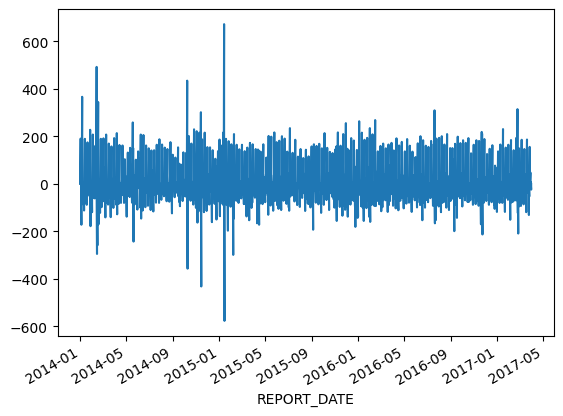

In [199]:
df_data['Rain_3_day_ago'].plot()

In [213]:
df_data.head()

Fault ID INITIAL_MFL  RAINFALL_MM Day of Week  Day Num Cal Week  \
REPORT_DATE                                                                    
2014-01-01   ID000001          CE         10.6   Wednesday                 2   
2014-01-01   ID000002          CA         10.6   Wednesday                 2   
2014-01-01   ID000003       OTHER         10.6   Wednesday                 2   
2014-01-01   ID000004          OK         10.6   Wednesday                 2   
2014-01-01   ID000005          LN         10.6   Wednesday                 2   

             Day Num Cal Month  Day Num Cal Year Bank Holiday  Faults_per_Day  \
REPORT_DATE                                                                     
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   

             Rain_3_day_ago  Rain_5_day_ago  Rain_7_day_ago  Rain_15_day_ago  \
REPORT_DATE                                                                    
2014-01-01              NaN             NaN             NaN              NaN   
2014-01-01              NaN             NaN             NaN              NaN   
2014-01-01              NaN             NaN             NaN              NaN   
2014-01-01              0.0             NaN             NaN              NaN   
2014-01-01              0.0             NaN             NaN              NaN   

             Rain_31_day_ago  Seasonal_First_Difference  
REPORT_DATE                                              
2014-01-01               NaN                        NaN  
2014-01-01               NaN                        NaN  
2014-01-01               NaN                        NaN  
2014-01-01               NaN                        NaN  
2014-01-01               NaN                        NaN

<Axes: xlabel='REPORT_DATE'>

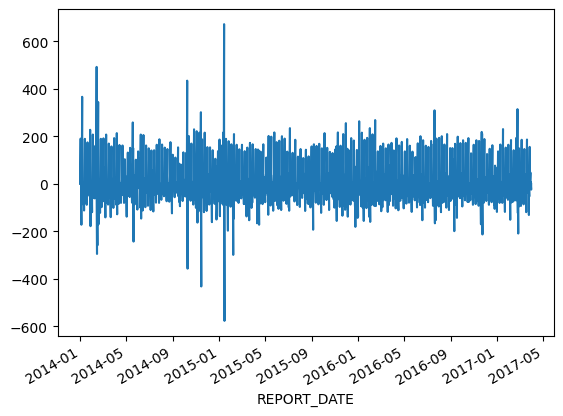

In [143]:
df_data['Seasonal_First_Difference'].plot()

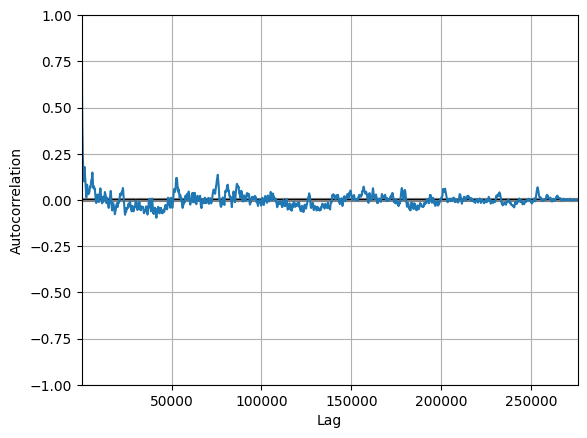

In [214]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_data['Faults_per_Day'])
plt.show()

In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

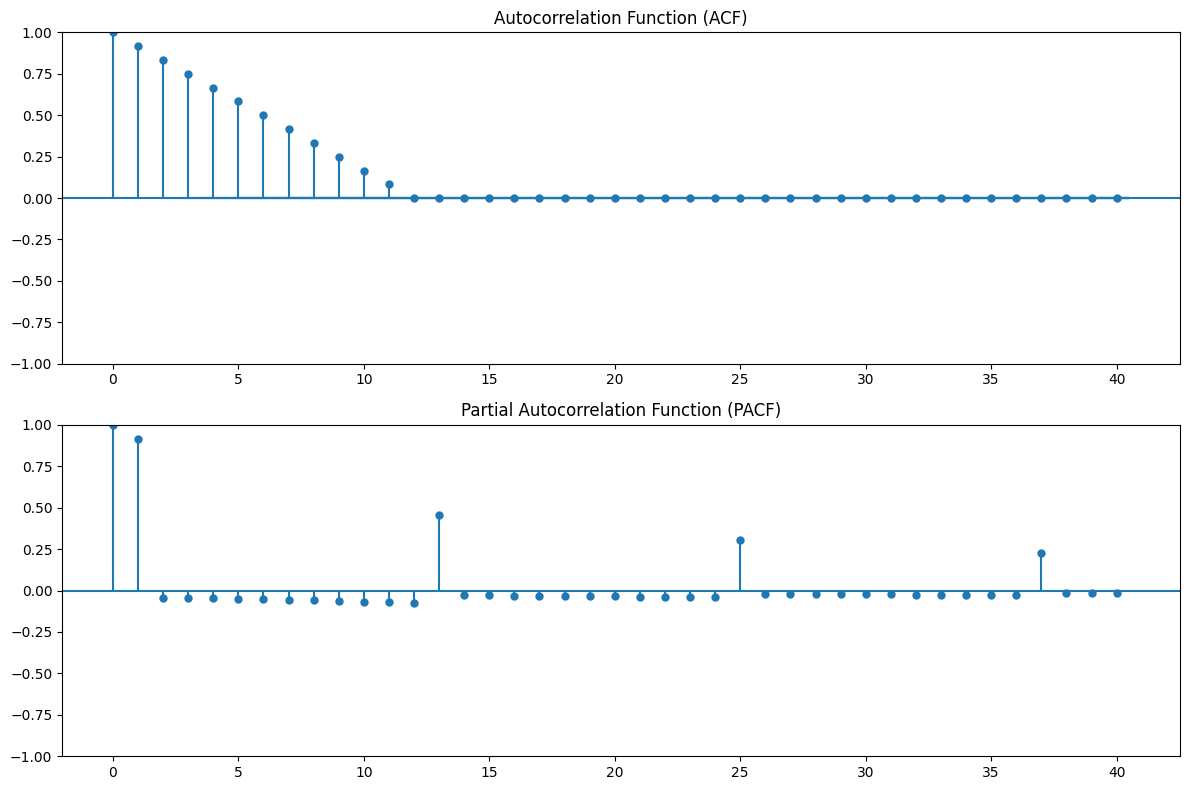

In [153]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df_data is already defined and contains the 'Seasonal_First_Difference' column
fig = plt.figure(figsize=(12, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_data['Seasonal_First_Difference'].dropna(), lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_data['Seasonal_First_Difference'].dropna(), lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Show the plots
plt.tight_layout()
plt.show()


In [154]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA




/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


                               SARIMAX Results                                
Dep. Variable:         Faults_per_Day   No. Observations:               275884
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -901309.075
Date:                Fri, 24 May 2024   AIC                        1802624.149
Time:                        03:52:35   BIC                        1802655.732
Sample:                             0   HQIC                       1802633.317
                             - 275884                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2        40.2912      0.004   1.09e+04      0.0

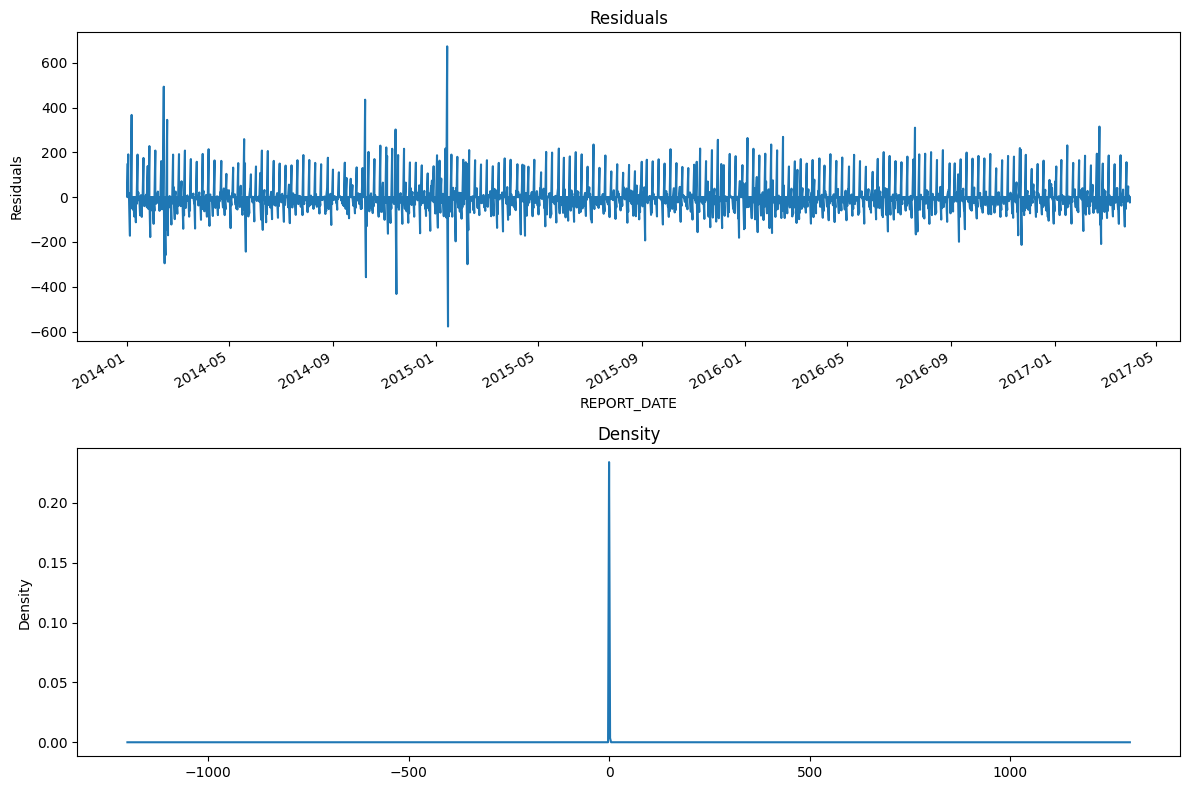

In [148]:
# Fit ARIMA model
model = ARIMA(df_data['Faults_per_Day'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the residuals
residuals = model_fit.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot residuals
residuals.plot(title="Residuals", ax=ax[0])
ax[0].set_ylabel("Residuals")

# Plot residual density
residuals.plot(kind='kde', title='Density', ax=ax[1])
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [149]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Faults_per_Day   No. Observations:               275884
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -901309.075
Date:                Fri, 24 May 2024   AIC                        1802624.149
Time:                        03:53:14   BIC                        1802655.732
Sample:                             0   HQIC                       1802633.317
                             - 275884                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2        40.2912      0.004   1.09e+04      0.000      40.284      40.298
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):       34141574038.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            13.37
Prob(H) (two-sided):                  0.00   Kurtosis:                      1726.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
import statsmodels.api as sm

In [96]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Ensure that the index is in datetime format
df_data.index = pd.to_datetime(df_data.index)

# Generate future dates extending 24 months into the future
future_dates = [df_data.index[-1] + DateOffset(months=x) for x in range(1, 25)]

In [97]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [98]:
future_datest_df.tail()

Fault ID REPORT_DATE INITIAL_MFL RAINFALL_MM Day of Week  \
2018-11-30      NaN         NaN         NaN         NaN         NaN   
2018-12-31      NaN         NaN         NaN         NaN         NaN   
2019-01-31      NaN         NaN         NaN         NaN         NaN   
2019-02-28      NaN         NaN         NaN         NaN         NaN   
2019-03-31      NaN         NaN         NaN         NaN         NaN   

           Day Num Cal Week Day Num Cal Month Day Num Cal Year Bank Holiday  
2018-11-30              NaN               NaN              NaN          NaN  
2018-12-31              NaN               NaN              NaN          NaN  
2019-01-31              NaN               NaN              NaN          NaN  
2019-02-28              NaN               NaN              NaN          NaN  
2019-03-31              NaN               NaN              NaN          NaN

In [99]:
future_df=pd.concat([df_data,future_datest_df])

/var/folders/dj/_vpqfgb17k18nd8kb1yplfgh0000gn/T/ipykernel_48018/833843873.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df_data,future_datest_df])


In [156]:
future_df.head()

Fault ID INITIAL_MFL  RAINFALL_MM Day of Week Day Num Cal Week  \
2014-01-01  ID000001          CE         10.6   Wednesday                2   
2014-01-01  ID000002          CA         10.6   Wednesday                2   
2014-01-01  ID000003       OTHER         10.6   Wednesday                2   
2014-01-01  ID000004          OK         10.6   Wednesday                2   
2014-01-01  ID000005          LN         10.6   Wednesday                2   

           Day Num Cal Month Day Num Cal Year Bank Holiday  Faults_per_Day  \
2014-01-01                 1                1            Y           146.0   
2014-01-01                 1                1            Y           146.0   
2014-01-01                 1                1            Y           146.0   
2014-01-01                 1                1            Y           146.0   
2014-01-01                 1                1            Y           146.0   

            Seasonal_First_Difference  forecast REPORT_DATE  
2014-01-01                        NaN       NaN         NaN  
2014-01-01                        NaN       NaN         NaN  
2014-01-01                        NaN       NaN         NaN  
2014-01-01                        NaN       NaN         NaN  
2014-01-01                        NaN       NaN         NaN

<Axes: >

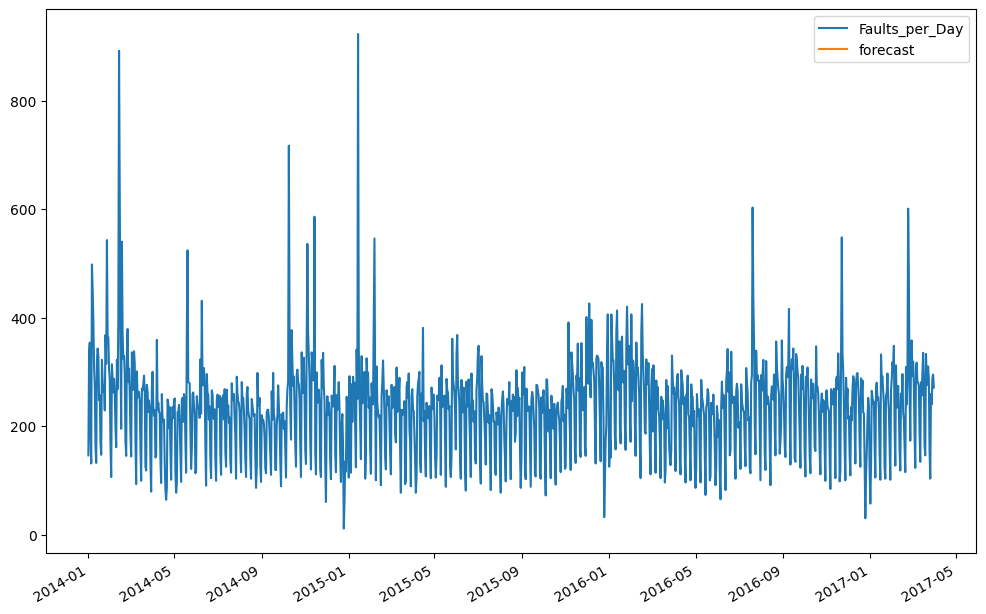

In [100]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Faults_per_Day', 'forecast']].plot(figsize=(12, 8)) 

In [59]:
data = df.copy()

# Convert date columns to datetime
data['REPORT_DATE'] = pd.to_datetime(data['REPORT_DATE'])

# Aggregate fault counts by date
daily_faults = data.groupby('REPORT_DATE').size().reset_index(name='fault_count')

# Set the REPORT_DATE as the index
daily_faults.set_index('REPORT_DATE', inplace=True)


In [60]:
from datetime import timedelta

# Define the split date
split_date = daily_faults.index[-365]

# Split the data
train = daily_faults[:split_date]
test = daily_faults[split_date:]


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


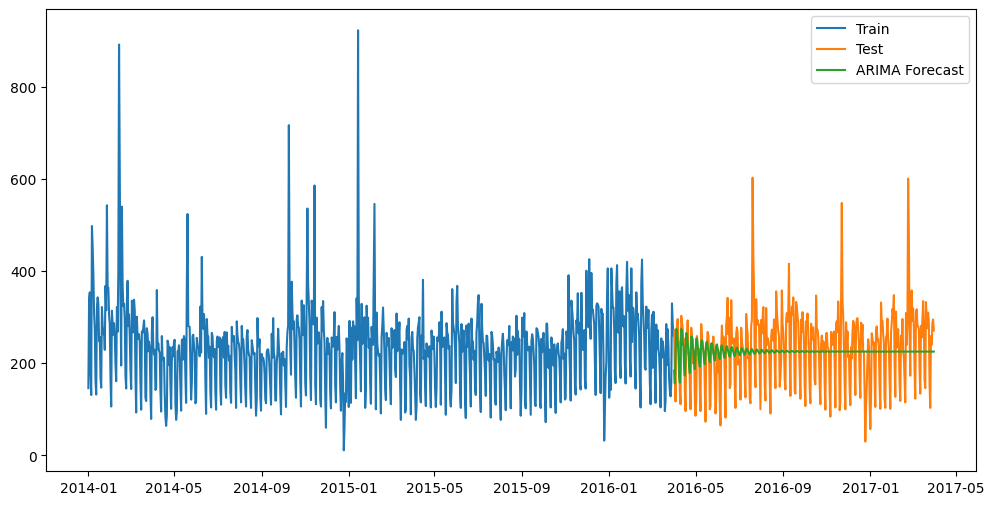

In [67]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
arima_model = ARIMA(train['fault_count'], order=(15,1,0))  # Adjust p, d, q as necessary
arima_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['fault_count'], label='Train')
plt.plot(test.index, test['fault_count'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()


In [66]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            fault_count   No. Observations:                  822
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4792.669
Date:                Fri, 24 May 2024   AIC                           9597.337
Time:                        16:07:03   BIC                           9625.601
Sample:                    01-01-2014   HQIC                          9608.182
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4499      0.022    -20.242      0.000      -0.493      -0.406
ar.L2         -0.5295      0.034    -15.729      0.000      -0.596      -0.464
ar.L3         -0.4283      0.030    -14.222      0.000      -0.487      -0.369
ar.L4         -0.3267      0.029    -11.078      0.000      -0.385      -0.269
ar.L5         -0.3965      0.023    -17.134      0.000      -0.442      -0.351
sigma2      6874.7941    151.905     45.257      0.000    6577.067    7172.522
===================================================================================
Ljung-Box (L1) (Q):                  31.03   Jarque-Bera (JB):              3485.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99513D+00    |proj g|=  2.72216D-01


 This problem is unconstrained.



At iterate    5    f=  5.92529D+00    |proj g|=  1.80202D-01

At iterate   10    f=  5.84940D+00    |proj g|=  2.98503D-02

At iterate   15    f=  5.84595D+00    |proj g|=  3.86007D-03

At iterate   20    f=  5.79687D+00    |proj g|=  1.13833D-01

At iterate   25    f=  5.77544D+00    |proj g|=  4.78817D-03

At iterate   30    f=  5.77541D+00    |proj g|=  2.52852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     37      1     0     0   2.529D-05   5.775D+00
  F =   5.7754060095955193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


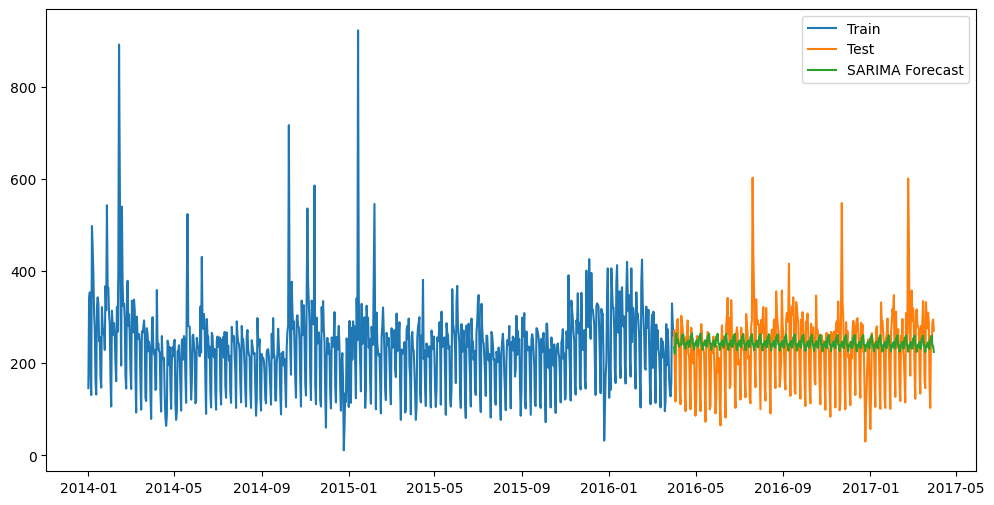

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(train['fault_count'], order=(5,1,0), seasonal_order=(1,1,1,12))  # Adjust parameters as necessary
sarima_fit = sarima_model.fit()

# Forecast with SARIMA
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['fault_count'], label='Train')
plt.plot(test.index, test['fault_count'], label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.show()


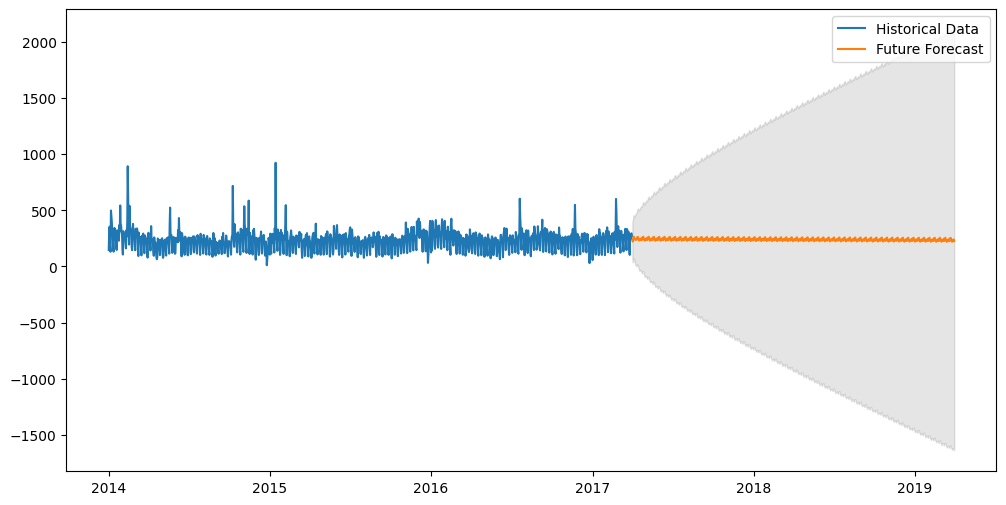

In [26]:
# Forecasting future fault volumes
future_steps = 365 * 2  # Predicting for the next 2 years
future_forecast = sarima_fit.get_forecast(steps=future_steps)

# Get confidence intervals
forecast_ci = future_forecast.conf_int()

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_faults.index, daily_faults['fault_count'], label='Historical Data')
future_index = pd.date_range(start=daily_faults.index[-1] + timedelta(days=1), periods=future_steps, freq='D')
plt.plot(future_index, future_forecast.predicted_mean, label='Future Forecast')
plt.fill_between(future_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.legend()
plt.show()


In [41]:
df= df_data.copy()

In [42]:
# Aggregate daily fault counts
daily_faults = df.groupby('REPORT_DATE').size().reset_index(name='fault_count')

# Set the REPORT_DATE as the index
daily_faults.set_index('REPORT_DATE', inplace=True)

# Create rolling average and lag features for rainfall
df['Rainfall_7day_avg'] = df['RAINFALL_MM'].rolling(window=7).mean()
df['Rainfall_14day_avg'] = df['RAINFALL_MM'].rolling(window=14).mean()
df['Rainfall_30day_avg'] = df['RAINFALL_MM'].rolling(window=30).mean()
df['Rainfall_1day_lag'] = df['RAINFALL_MM'].shift(1)
df['Rainfall_7day_lag'] = df['RAINFALL_MM'].shift(7)



In [43]:
print(df.columns)

Index(['Fault ID', 'REPORT_DATE', 'INITIAL_MFL', 'RAINFALL_MM', 'Day of Week',
       'Day Num Cal Week', 'Day Num Cal Month', 'Day Num Cal Year',
       'Bank Holiday', 'Rainfall_7day_avg', 'Rainfall_14day_avg',
       'Rainfall_30day_avg', 'Rainfall_1day_lag', 'Rainfall_7day_lag'],
      dtype='object')


In [44]:
# Create categorical features for fault types
fault_type_dummies = pd.get_dummies(df['INITIAL_MFL'], prefix='fault_type')

# Merge the datasets
df = pd.concat([df, fault_type_dummies], axis=1)

# Encode day of the week and bank holidays
df['Day_of_Week'] = df['Day of Week'].astype('category').cat.codes
df['Bank_Holiday'] = df['Bank Holiday'].apply(lambda x: 1 if x == 'Y' else 0)  # Use 'Bank holiday' if this is the correct column name


# Ensure data alignment with daily_faults
df = df.set_index('REPORT_DATE').join(daily_faults, how='left').reset_index()


In [46]:
# Define the features and target variable
features = [
    'Rainfall_7day_avg', 'Rainfall_14day_avg', 'Rainfall_30day_avg', 
    'Rainfall_1day_lag', 'Rainfall_7day_lag', 'Day_of_Week', 'Bank_Holiday'
] + list(fault_type_dummies.columns)

X = df[features].fillna(0)
y = df['fault_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Random Forest RMSE: {rmse}')


Random Forest RMSE: 47.49047008585616


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings

In [56]:
models = {
     "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 46.0939
- Mean Absolute Error: 22.5818
- R2 Score: 0.7860
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 47.4836
- Mean Absolute Error: 23.9720
- R2 Score: 0.7689
XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 47.6484
- Mean Absolute Error: 26.4340
- R2 Score: 0.7713
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 48.0707
- Mean Absolute Error: 26.8273
- R2 Score: 0.7631


In [57]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 76.88


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98150D+00    |proj g|=  3.10243D-01


 This problem is unconstrained.



At iterate    5    f=  5.91523D+00    |proj g|=  1.94377D-01

At iterate   10    f=  5.82752D+00    |proj g|=  4.78369D-02

At iterate   15    f=  5.81897D+00    |proj g|=  5.58012D-03

At iterate   20    f=  5.77602D+00    |proj g|=  1.43271D-01

At iterate   25    f=  5.74970D+00    |proj g|=  5.05079D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     37      1     0     0   1.680D-05   5.750D+00
  F =   5.7496947004756267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


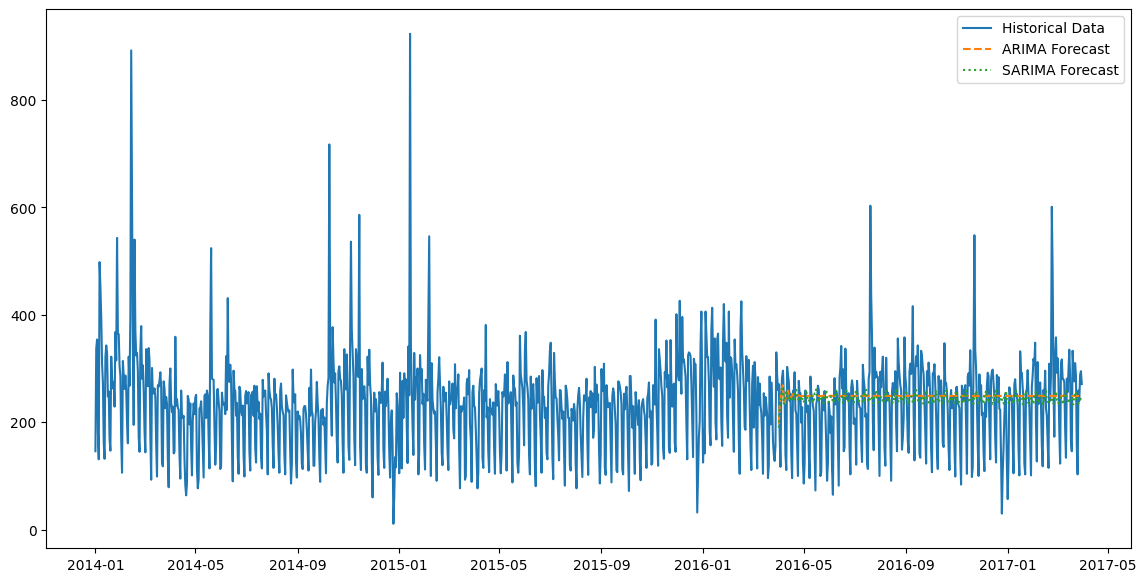

In [47]:
# Train ARIMA model (simplified example)
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(daily_faults['fault_count'], order=(5,1,0))  # Adjust p, d, q as necessary
arima_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_fit.forecast(steps=365)  # Forecasting 1 year ahead

# Train SARIMA model (example with seasonality)
sarima_model = SARIMAX(daily_faults['fault_count'], order=(5,1,0), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

# Forecast with SARIMA
sarima_forecast = sarima_fit.forecast(steps=365)  # Forecasting 1 year ahead

# Plot ARIMA and SARIMA results
plt.figure(figsize=(14, 7))
plt.plot(daily_faults.index, daily_faults['fault_count'], label='Historical Data')
plt.plot(daily_faults.index[-365:], arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(daily_faults.index[-365:], sarima_forecast, label='SARIMA Forecast', linestyle=':')
plt.legend()
plt.show()

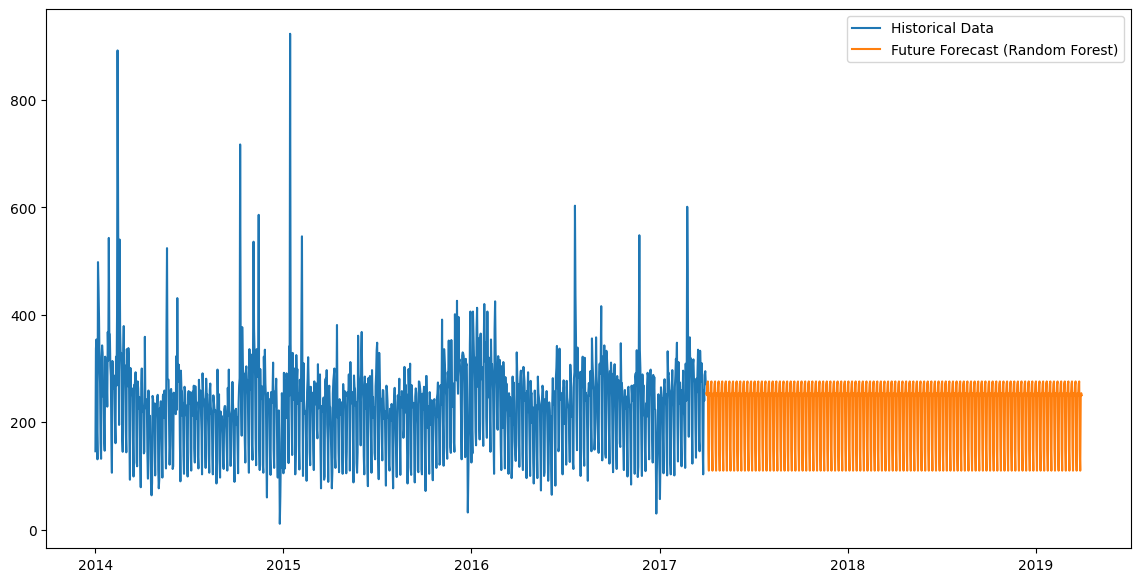

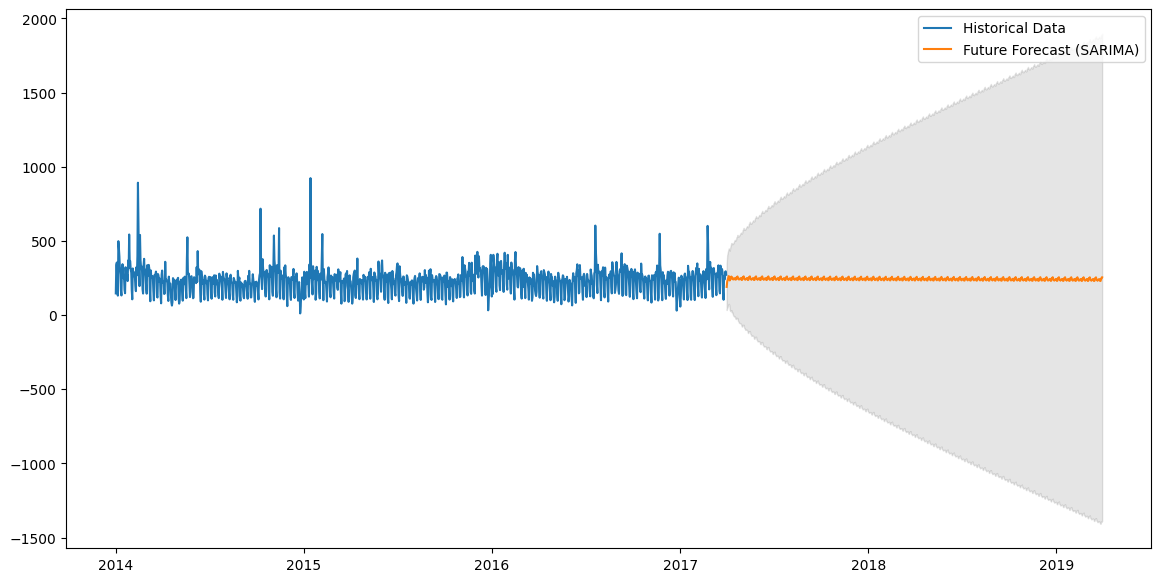

In [48]:
# Forecasting future fault volumes with Random Forest
future_steps = 365 * 2  # Predicting for the next 2 years
future_index = pd.date_range(start=daily_faults.index[-1] + timedelta(days=1), periods=future_steps, freq='D')

# Create future data with necessary features
future_data = pd.DataFrame(index=future_index)
future_data['Rainfall_7day_avg'] = np.nan  # Replace with actual future rainfall predictions or use historical average
future_data['Rainfall_14day_avg'] = np.nan
future_data['Rainfall_30day_avg'] = np.nan
future_data['Rainfall_1day_lag'] = np.nan
future_data['Rainfall_7day_lag'] = np.nan
future_data['Day_of_Week'] = future_index.dayofweek
future_data['Bank_Holiday'] = 0  # Assume no bank holidays for simplicity
# Ensure fault type dummies are consistent
for col in fault_type_dummies.columns:
    future_data[col] = 0  # Adjust according to expected future fault types

# Predict future fault volumes
future_forecast_rf = rf_model.predict(future_data.fillna(0))

# Plot future forecast with Random Forest
plt.figure(figsize=(14, 7))
plt.plot(daily_faults.index, daily_faults['fault_count'], label='Historical Data')
plt.plot(future_index, future_forecast_rf, label='Future Forecast (Random Forest)')
plt.legend()
plt.show()

# Forecast future fault volumes with SARIMA
future_forecast_sarima = sarima_fit.get_forecast(steps=future_steps)
forecast_ci = future_forecast_sarima.conf_int()

# Plot future forecast with SARIMA
plt.figure(figsize=(14, 7))
plt.plot(daily_faults.index, daily_faults['fault_count'], label='Historical Data')
plt.plot(future_index, future_forecast_sarima.predicted_mean, label='Future Forecast (SARIMA)')
plt.fill_between(future_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.legend()
plt.show()


In [ ]:
model_fit.summary(

In [101]:
df_data.head()

Fault ID INITIAL_MFL  RAINFALL_MM Day of Week  Day Num Cal Week  \
REPORT_DATE                                                                    
2014-01-01   ID000001          CE         10.6   Wednesday                 2   
2014-01-01   ID000002          CA         10.6   Wednesday                 2   
2014-01-01   ID000003       OTHER         10.6   Wednesday                 2   
2014-01-01   ID000004          OK         10.6   Wednesday                 2   
2014-01-01   ID000005          LN         10.6   Wednesday                 2   

             Day Num Cal Month  Day Num Cal Year Bank Holiday  Faults_per_Day  \
REPORT_DATE                                                                     
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   
2014-01-01                   1                 1            Y             146   

             Seasonal_First_Difference  forecast  
REPORT_DATE                                       
2014-01-01                         NaN       NaN  
2014-01-01                         NaN       NaN  
2014-01-01                         NaN       NaN  
2014-01-01                         NaN       NaN  
2014-01-01                         NaN       NaN

**Create lagged variables for rainfall (e.g., rainfall 1 day ago, 3 days ago, 7 days ago) to capture both short-term and long-term effects.**

In [32]:
df_data['Rainfall_1_day_ago'] = df_data['RAINFALL_MM'].shift(1)
df_data['Rainfall_3_days_ago'] = df_data['RAINFALL_MM'].shift(3)
df_data['Rainfall_5_days_ago'] = df_data['RAINFALL_MM'].shift(5)
df_data['Rainfall_7_days_ago'] = df_data['RAINFALL_MM'].shift(7)
df_data

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0       ID000001  2014-01-01          CE         10.6   Wednesday   
1       ID000002  2014-01-01          CA         10.6   Wednesday   
2       ID000003  2014-01-01       OTHER         10.6   Wednesday   
3       ID000004  2014-01-01          OK         10.6   Wednesday   
4       ID000005  2014-01-01          LN         10.6   Wednesday   
...          ...         ...         ...          ...         ...   
275879  ID275581  2017-03-31          CE          1.6      Friday   
275880  ID275586  2017-03-31          CE          1.6      Friday   
275881  ID275589  2017-03-31          CA          1.6      Friday   
275882  ID275590  2017-03-31          CA          1.6      Friday   
275883  ID275591  2017-03-31          OK          1.6      Friday   

        Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
0                      2                  1                 1            Y   
1                      2                  1                 1            Y   
2                      2                  1                 1            Y   
3                      2                  1                 1            Y   
4                      2                  1                 1            Y   
...                  ...                ...               ...          ...   
275879                 4                 31                90            N   
275880                 4                 31                90            N   
275881                 4                 31                90            N   
275882                 4                 31                90            N   
275883                 4                 31                90            N   

        Faults_per_Day  Rainfall_1_day_ago  Rainfall_3_days_ago  \
0                  146                 NaN                  NaN   
1                  146                10.6                  NaN   
2                  146                10.6                  NaN   
3                  146                10.6                 10.6   
4                  146                10.6                 10.6   
...                ...                 ...                  ...   
275879             271                 1.6                  1.6   
275880             271                 1.6                  1.6   
275881             271                 1.6                  1.6   
275882             271                 1.6                  1.6   
275883             271                 1.6                  1.6   

        Rainfall_5_days_ago  Rainfall_7_days_ago  
0                       NaN                  NaN  
1                       NaN                  NaN  
2                       NaN                  NaN  
3                       NaN                  NaN  
4                       NaN                  NaN  
...                     ...                  ...  
275879                  1.6                  1.6  
275880                  1.6                  1.6  
275881                  1.6                  1.6  
275882                  1.6                  1.6  
275883                  1.6                  1.6  

[275884 rows x 14 columns]

In [33]:
df_data.isna().sum()


Fault ID               0
REPORT_DATE            0
INITIAL_MFL            0
RAINFALL_MM            0
Day of Week            0
Day Num Cal Week       0
Day Num Cal Month      0
Day Num Cal Year       0
Bank Holiday           0
Faults_per_Day         0
Rainfall_1_day_ago     1
Rainfall_3_days_ago    3
Rainfall_5_days_ago    5
Rainfall_7_days_ago    7
dtype: int64

In [34]:
# Calculate skewness for each lagged rainfall feature relative to RAINFALL_MM
skewness_1_day_ago = df_data['Rainfall_1_day_ago'].sub(df_data['RAINFALL_MM']).skew()
skewness_3_days_ago = df_data['Rainfall_3_days_ago'].sub(df_data['RAINFALL_MM']).skew()
skewness_5_days_ago = df_data['Rainfall_5_days_ago'].sub(df_data['RAINFALL_MM']).skew()
skewness_7_days_ago = df_data['Rainfall_7_days_ago'].sub(df_data['RAINFALL_MM']).skew()

# Print skewness for each lagged rainfall feature
print("Skewness of Rainfall_1_day_ago relative to RAINFALL_MM:", skewness_1_day_ago)
print("Skewness of Rainfall_3_days_ago relative to RAINFALL_MM:", skewness_3_days_ago)
print("Skewness of Rainfall_5_days_ago relative to RAINFALL_MM:", skewness_5_days_ago)
print("Skewness of Rainfall_7_days_ago relative to RAINFALL_MM:", skewness_7_days_ago)


Skewness of Rainfall_1_day_ago relative to RAINFALL_MM: -4.843483259672116
Skewness of Rainfall_3_days_ago relative to RAINFALL_MM: -2.847065849324177
Skewness of Rainfall_5_days_ago relative to RAINFALL_MM: -2.2135004779267495
Skewness of Rainfall_7_days_ago relative to RAINFALL_MM: -1.873830779015943


In [35]:
df_data['Rainfall_1_day_ago'].fillna(df_data['Rainfall_1_day_ago'].median(),inplace=True)
df_data['Rainfall_3_days_ago'].fillna(df_data['Rainfall_3_days_ago'].median(),inplace=True)
df_data['Rainfall_5_days_ago'].fillna(df_data['Rainfall_5_days_ago'].median(),inplace=True)
df_data['Rainfall_7_days_ago'].fillna(df_data['Rainfall_7_days_ago'].median(),inplace=True)
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000002  2014-01-01          CA         10.6   Wednesday   
2  ID000003  2014-01-01       OTHER         10.6   Wednesday   
3  ID000004  2014-01-01          OK         10.6   Wednesday   
4  ID000005  2014-01-01          LN         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
0                 2                  1                 1            Y   
1                 2                  1                 1            Y   
2                 2                  1                 1            Y   
3                 2                  1                 1            Y   
4                 2                  1                 1            Y   

   Faults_per_Day  Rainfall_1_day_ago  Rainfall_3_days_ago  \
0             146                 1.6                  1.6   
1             146                10.6                  1.6   
2             146                10.6                  1.6   
3             146                10.6                 10.6   
4             146                10.6                 10.6   

   Rainfall_5_days_ago  Rainfall_7_days_ago  
0                  1.6                  1.6  
1                  1.6                  1.6  
2                  1.6                  1.6  
3                  1.6                  1.6  
4                  1.6                  1.6

In [36]:
df_data.isna().sum()

Fault ID               0
REPORT_DATE            0
INITIAL_MFL            0
RAINFALL_MM            0
Day of Week            0
Day Num Cal Week       0
Day Num Cal Month      0
Day Num Cal Year       0
Bank Holiday           0
Faults_per_Day         0
Rainfall_1_day_ago     0
Rainfall_3_days_ago    0
Rainfall_5_days_ago    0
Rainfall_7_days_ago    0
dtype: int64

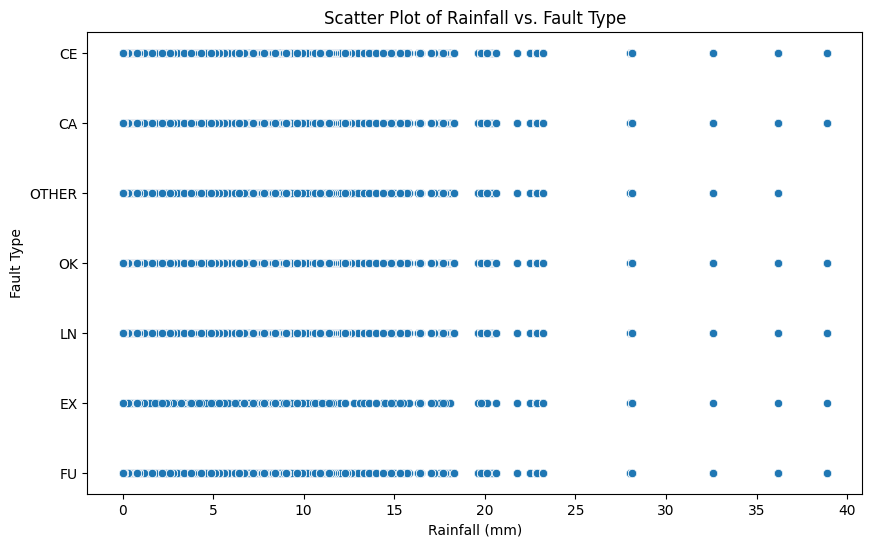

In [37]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_data, x='RAINFALL_MM', y='INITIAL_MFL')
plt.title('Scatter Plot of Rainfall vs. Fault Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Fault Type')
plt.show()

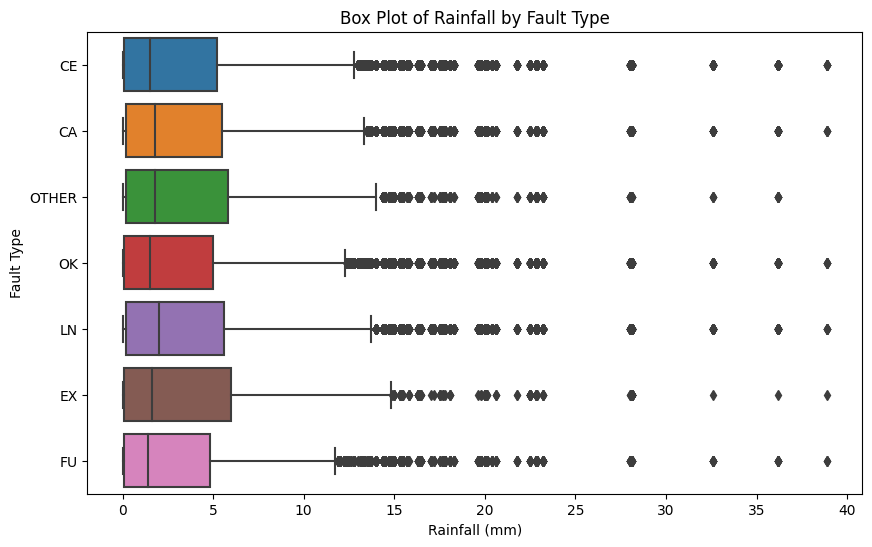

In [38]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='RAINFALL_MM', y='INITIAL_MFL')
plt.title('Box Plot of Rainfall by Fault Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Fault Type')
plt.show()

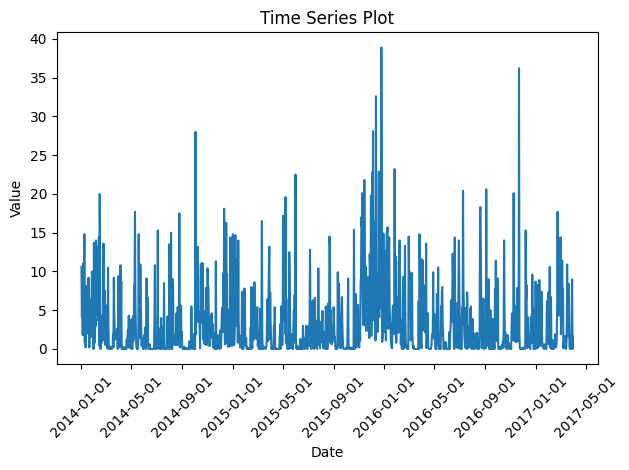

In [39]:
import matplotlib.dates as mdates
# Plot time series data
plt.plot(df_data.REPORT_DATE, df_data['RAINFALL_MM'])

# Set x-axis date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust the date format as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Show plot
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

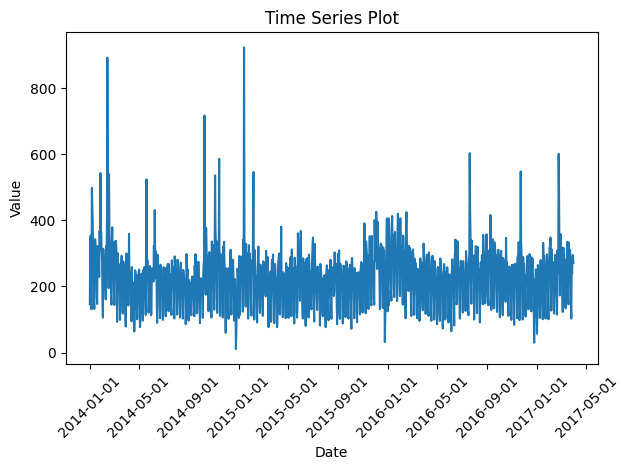

In [40]:
import matplotlib.dates as mdates
# Plot time series data
plt.plot(df_data.REPORT_DATE, df_data['Faults_per_Day'])

# Set x-axis date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust the date format as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Show plot
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

In [41]:
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000002  2014-01-01          CA         10.6   Wednesday   
2  ID000003  2014-01-01       OTHER         10.6   Wednesday   
3  ID000004  2014-01-01          OK         10.6   Wednesday   
4  ID000005  2014-01-01          LN         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
0                 2                  1                 1            Y   
1                 2                  1                 1            Y   
2                 2                  1                 1            Y   
3                 2                  1                 1            Y   
4                 2                  1                 1            Y   

   Faults_per_Day  Rainfall_1_day_ago  Rainfall_3_days_ago  \
0             146                 1.6                  1.6   
1             146                10.6                  1.6   
2             146                10.6                  1.6   
3             146                10.6                 10.6   
4             146                10.6                 10.6   

   Rainfall_5_days_ago  Rainfall_7_days_ago  
0                  1.6                  1.6  
1                  1.6                  1.6  
2                  1.6                  1.6  
3                  1.6                  1.6  
4                  1.6                  1.6

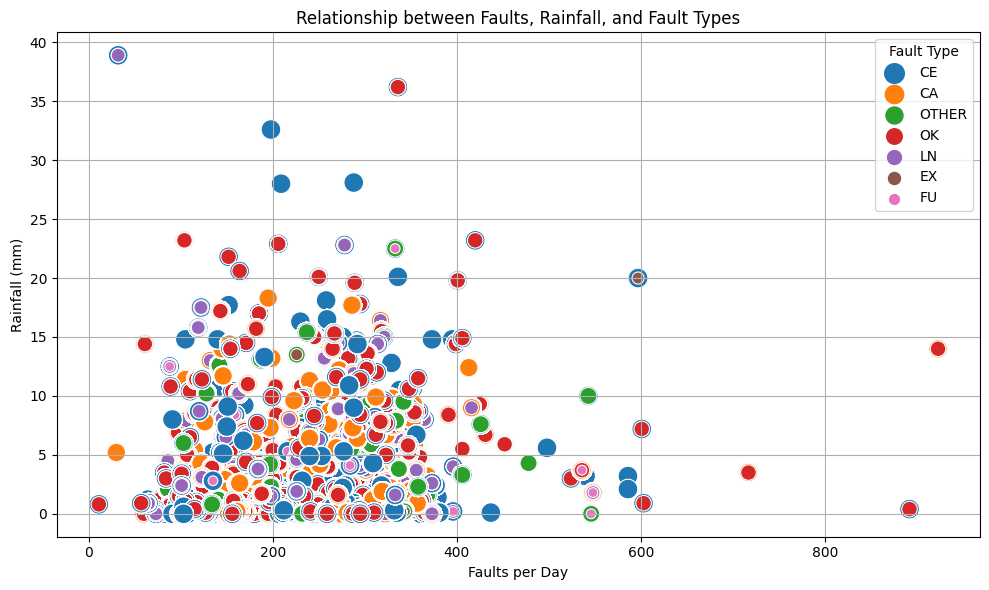

In [42]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_data, x='Faults_per_Day', y='RAINFALL_MM', hue='INITIAL_MFL', size='INITIAL_MFL', sizes=(50, 200))
plt.xlabel('Faults per Day')
plt.ylabel('Rainfall (mm)')
plt.title('Relationship between Faults, Rainfall, and Fault Types')
plt.legend(title='Fault Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

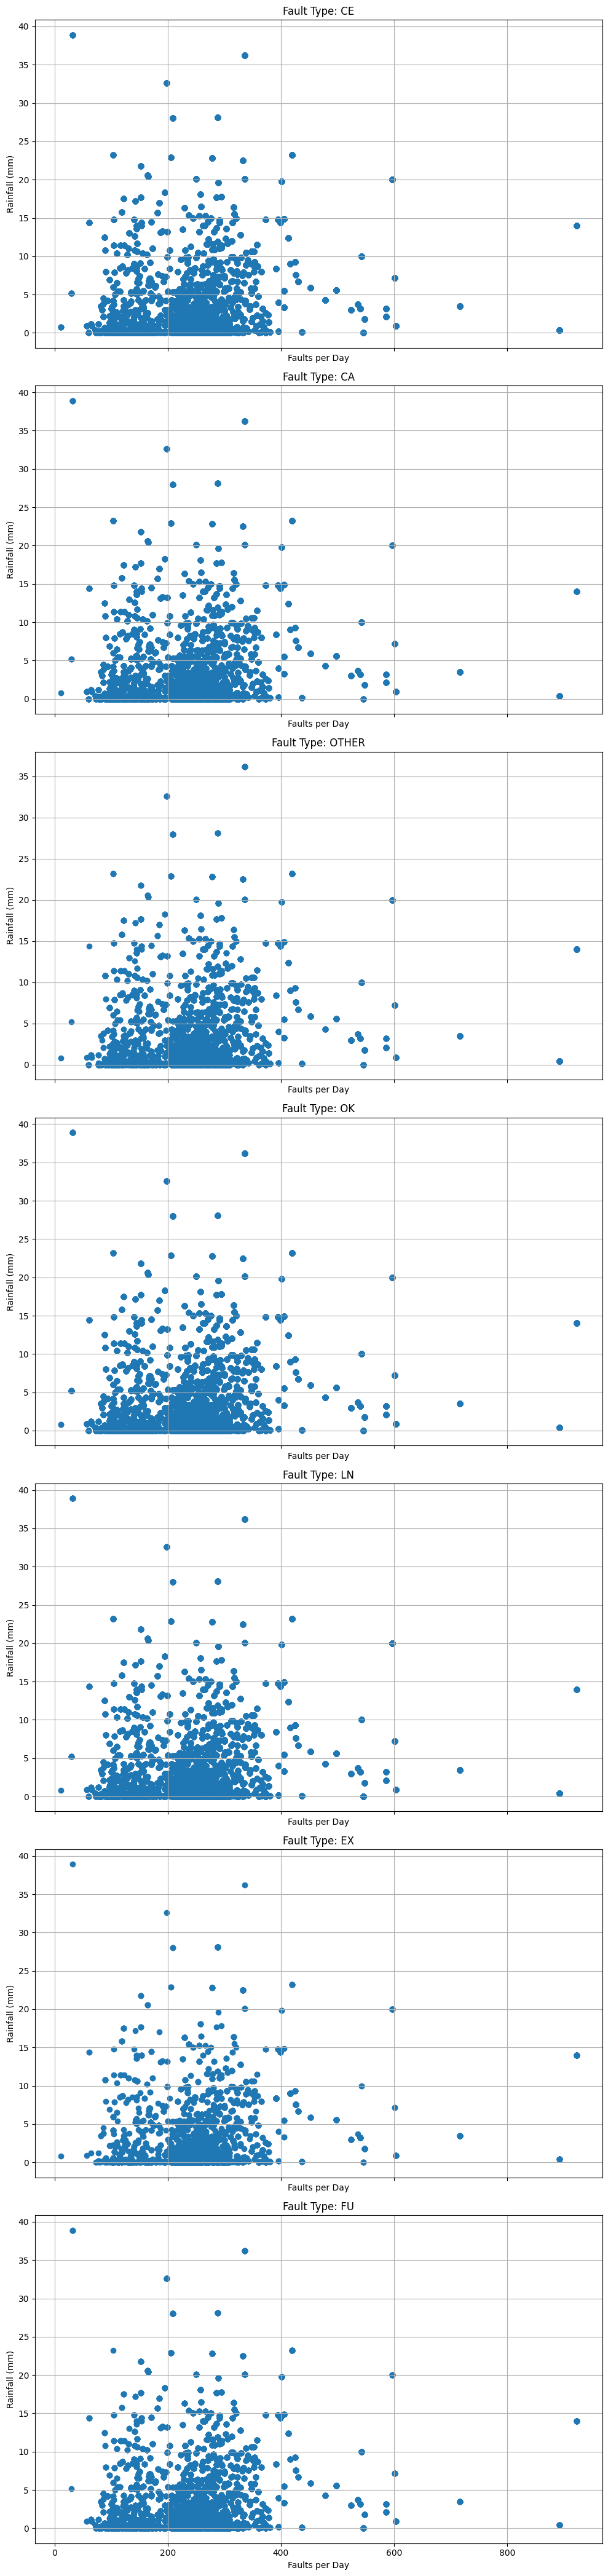

In [43]:
# List of unique fault types
fault_types = df_data['INITIAL_MFL'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(fault_types), ncols=1, figsize=(10, 6 * len(fault_types)), sharex=True)

# Iterate over fault types and create scatter plots
for i, fault_type in enumerate(fault_types):
    subset_data = df_data[df_data['INITIAL_MFL'] == fault_type]
    axes[i].scatter(subset_data['Faults_per_Day'], subset_data['RAINFALL_MM'])
    axes[i].set_title(f'Fault Type: {fault_type}')
    axes[i].set_xlabel('Faults per Day')
    axes[i].set_ylabel('Rainfall (mm)')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

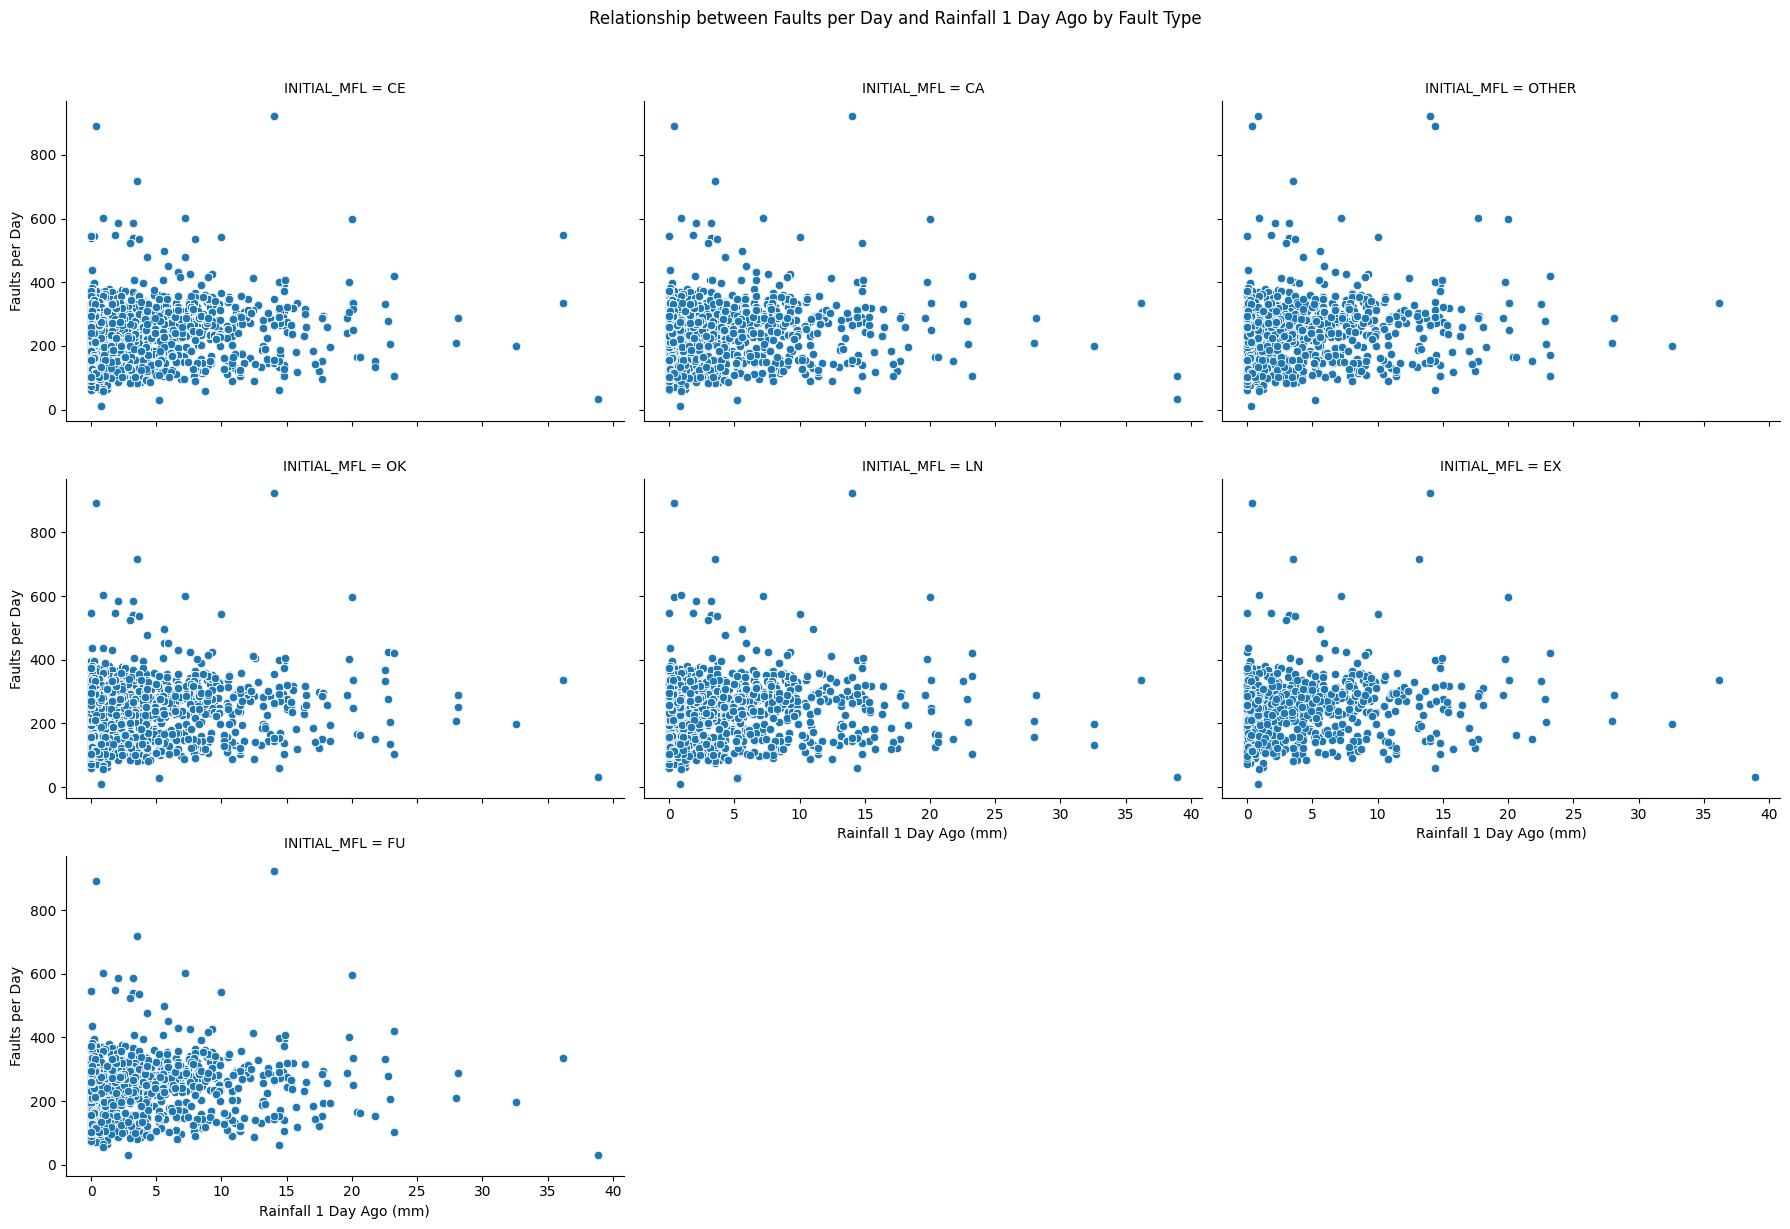

In [44]:
# Create a FacetGrid with seaborn
g = sns.FacetGrid(df_data, col="INITIAL_MFL", col_wrap=3, height=4, aspect=1.5)

# Map a scatterplot to the grid
g.map(sns.scatterplot, "Rainfall_1_day_ago", "Faults_per_Day")

# Add axis labels and title
g.set_axis_labels("Rainfall 1 Day Ago (mm)", "Faults per Day")
g.fig.suptitle("Relationship between Faults per Day and Rainfall 1 Day Ago by Fault Type", y=1.02)

# Show plot
plt.tight_layout()
plt.show()

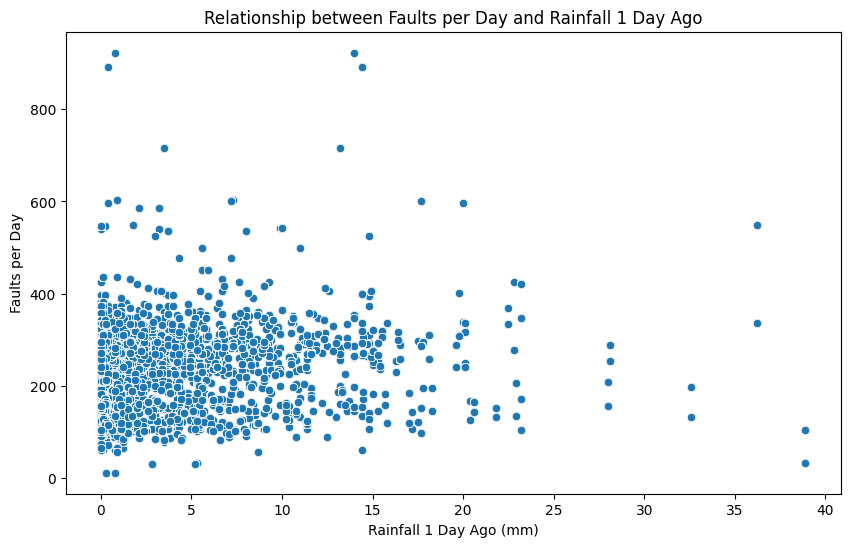

In [45]:
# Scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall_5_days_ago', y='Faults_per_Day', data=df_data)

# Add axis labels and title
plt.xlabel('Rainfall 1 Day Ago (mm)')
plt.ylabel('Faults per Day')
plt.title('Relationship between Faults per Day and Rainfall 1 Day Ago')

# Show plot
plt.show()

In [46]:
print(df_data['INITIAL_MFL'].value_counts())

INITIAL_MFL
OK       82553
CE       81279
LN       45654
CA       32318
FU       15174
OTHER    14111
EX        4795
Name: count, dtype: int64


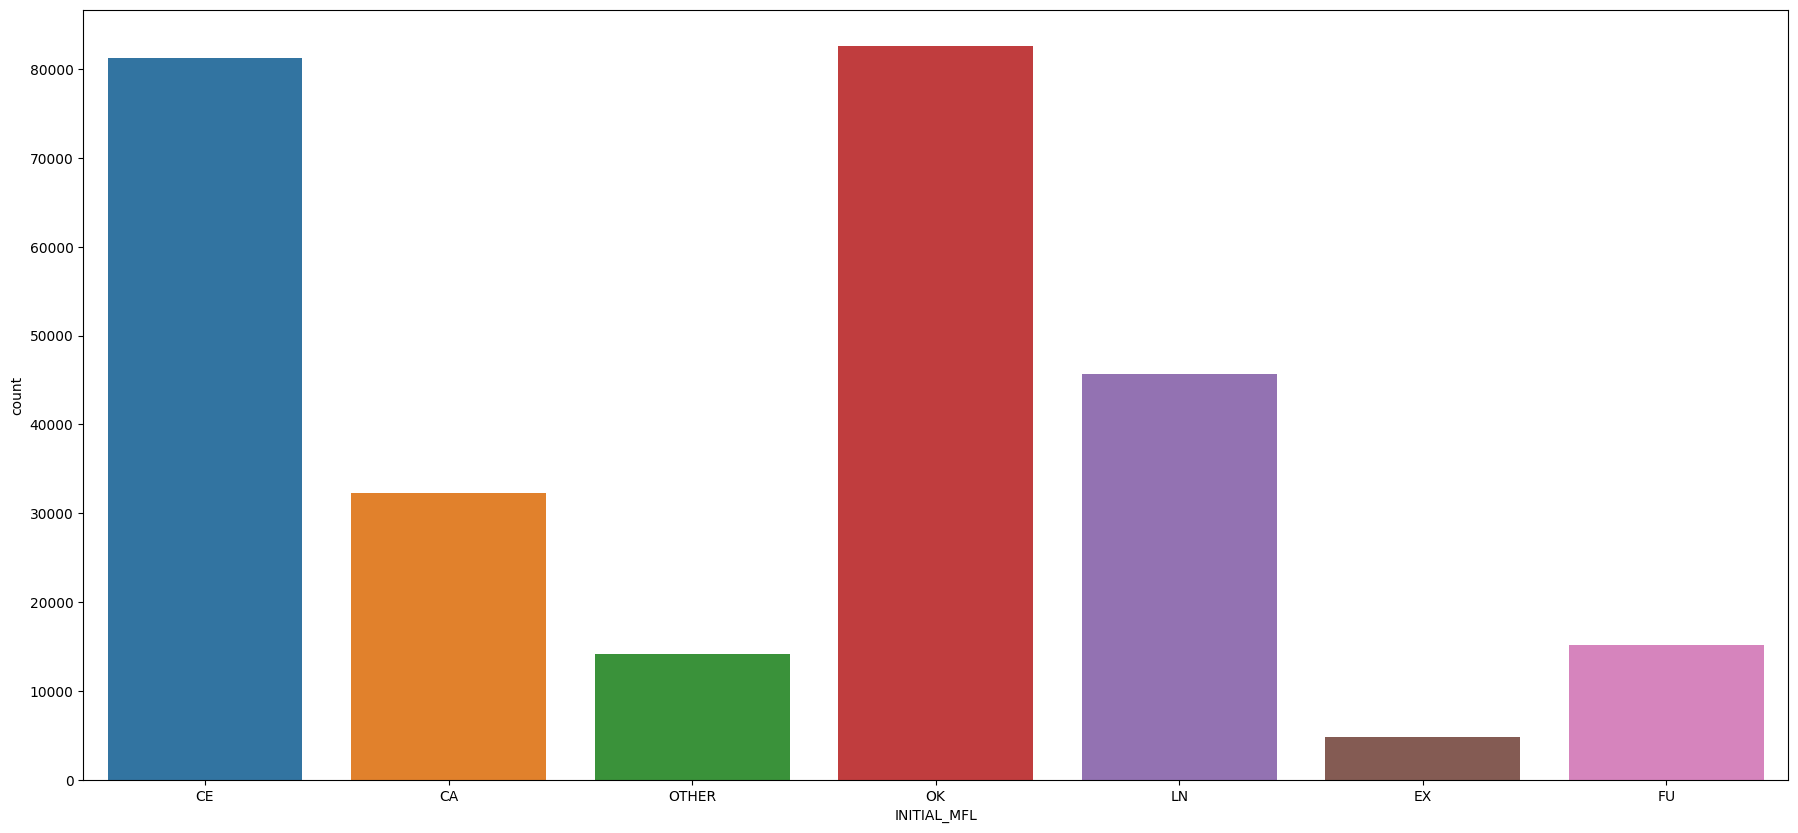

In [47]:
plt.figure(figsize=(22,10))
sns.countplot(x='INITIAL_MFL', data=df_data)
plt.show()

In [48]:
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000002  2014-01-01          CA         10.6   Wednesday   
2  ID000003  2014-01-01       OTHER         10.6   Wednesday   
3  ID000004  2014-01-01          OK         10.6   Wednesday   
4  ID000005  2014-01-01          LN         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
0                 2                  1                 1            Y   
1                 2                  1                 1            Y   
2                 2                  1                 1            Y   
3                 2                  1                 1            Y   
4                 2                  1                 1            Y   

   Faults_per_Day  Rainfall_1_day_ago  Rainfall_3_days_ago  \
0             146                 1.6                  1.6   
1             146                10.6                  1.6   
2             146                10.6                  1.6   
3             146                10.6                 10.6   
4             146                10.6                 10.6   

   Rainfall_5_days_ago  Rainfall_7_days_ago  
0                  1.6                  1.6  
1                  1.6                  1.6  
2                  1.6                  1.6  
3                  1.6                  1.6  
4                  1.6                  1.6

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

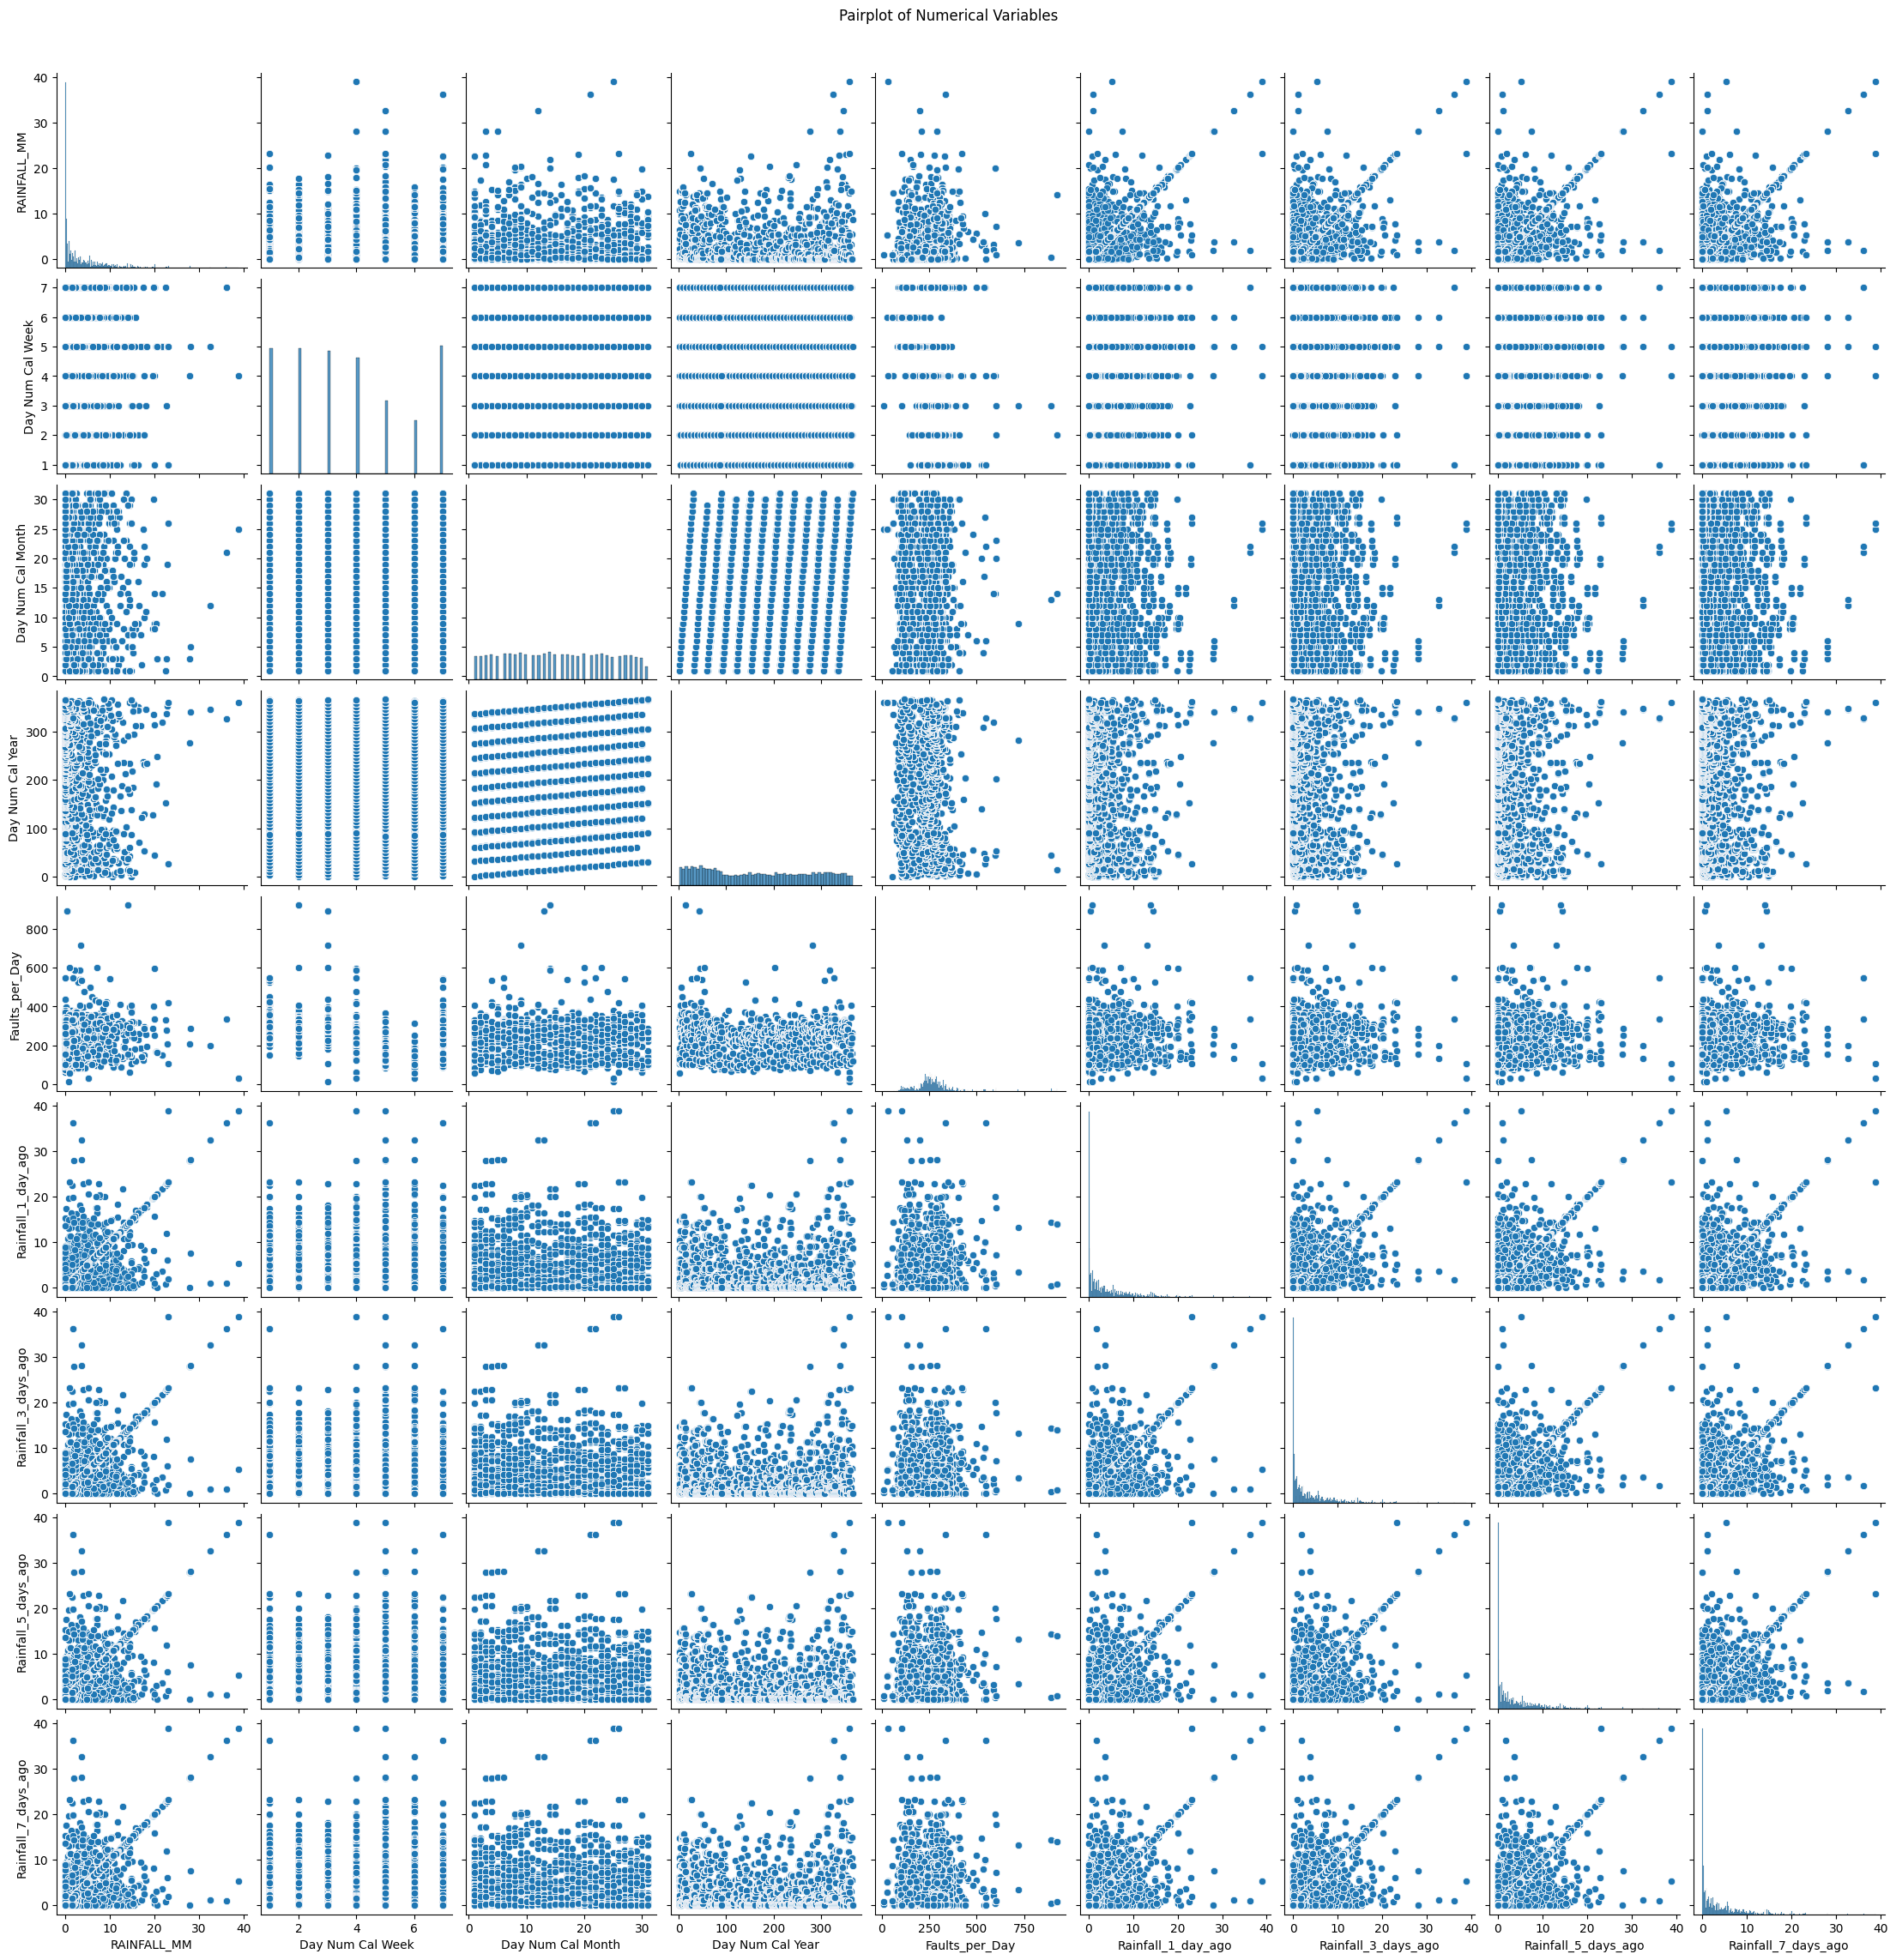

In [49]:
# Pairplot
sns.pairplot(df_data)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

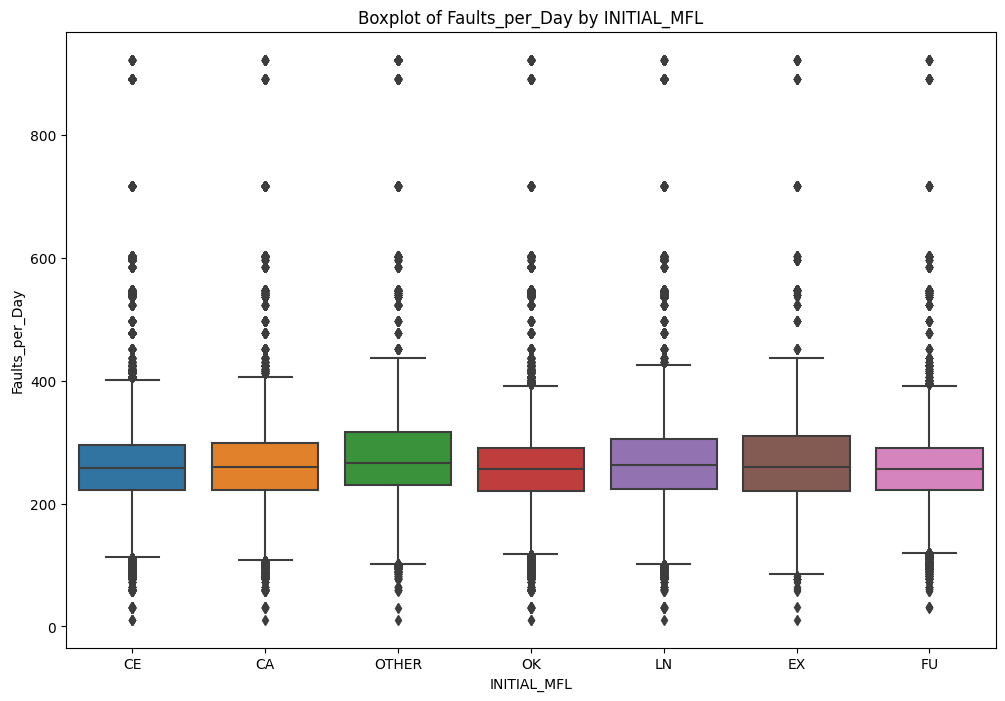

In [50]:
# Boxplot of Faults_per_Day by INITIAL_MFL
plt.figure(figsize=(12, 8))
sns.boxplot(x='INITIAL_MFL', y='Faults_per_Day', data=df_data)
plt.title('Boxplot of Faults_per_Day by INITIAL_MFL')
plt.show()


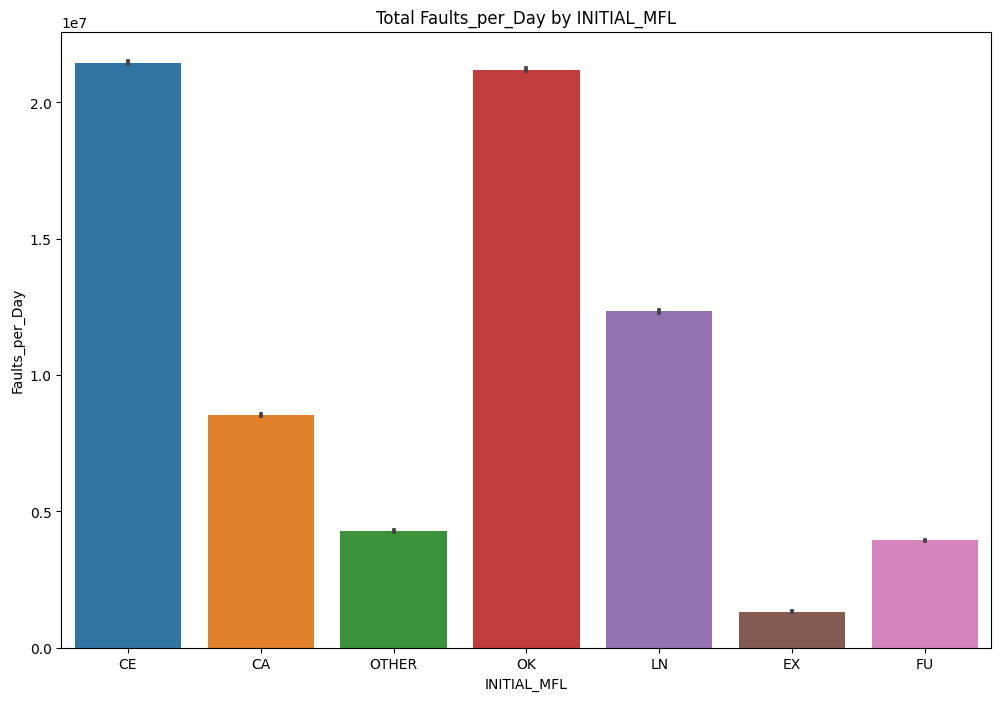

In [51]:
# Barplot of Faults_per_Day by INITIAL_MFL
plt.figure(figsize=(12, 8))
sns.barplot(x='INITIAL_MFL', y='Faults_per_Day', data=df_data, estimator=sum)
plt.title('Total Faults_per_Day by INITIAL_MFL')
plt.show()

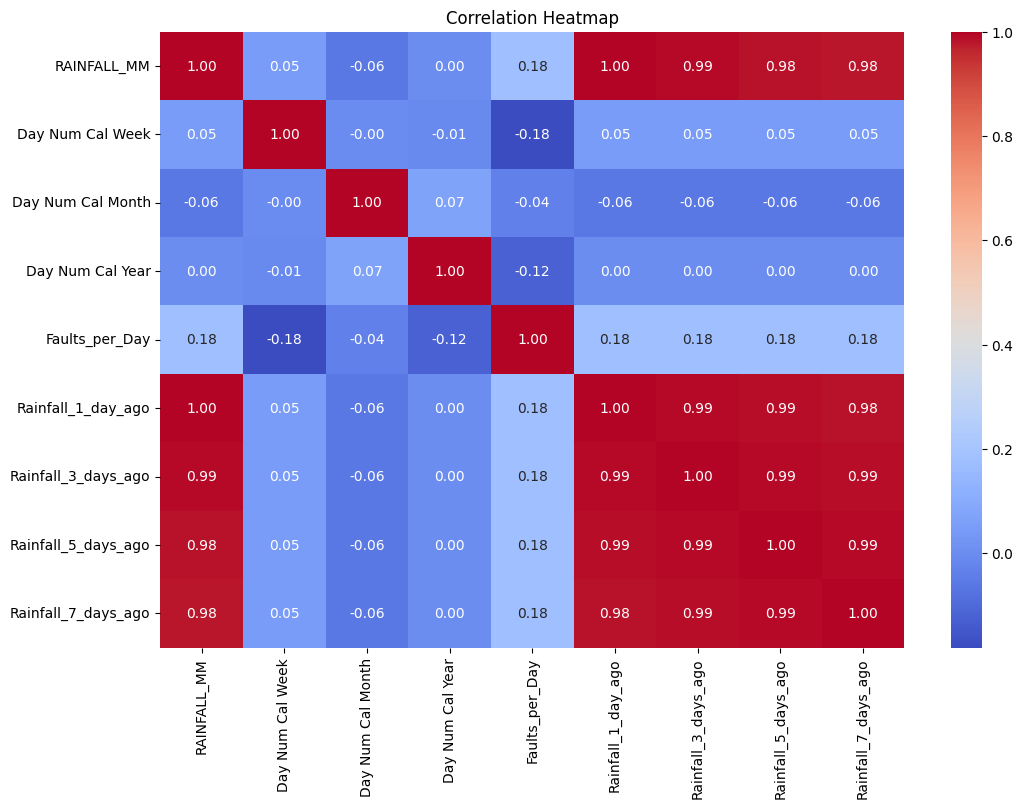

In [52]:
# Select only numerical columns
numeric_columns = df_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [53]:
sorted_data = df_data.sort_values(by='Faults_per_Day',ascending=False)
sorted_data.head(10)


Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
88656  ID088709  2015-01-14       OTHER         14.0   Wednesday   
88640  ID088690  2015-01-14       OTHER         14.0   Wednesday   
88638  ID088688  2015-01-14          EX         14.0   Wednesday   
88637  ID088687  2015-01-14          EX         14.0   Wednesday   
88636  ID088686  2015-01-14       OTHER         14.0   Wednesday   
88635  ID088685  2015-01-14          LN         14.0   Wednesday   
88634  ID088684  2015-01-14       OTHER         14.0   Wednesday   
88633  ID088683  2015-01-14          FU         14.0   Wednesday   
88632  ID088682  2015-01-14          EX         14.0   Wednesday   
88631  ID088681  2015-01-14       OTHER         14.0   Wednesday   

       Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
88656                 2                 14                14            N   
88640                 2                 14                14            N   
88638                 2                 14                14            N   
88637                 2                 14                14            N   
88636                 2                 14                14            N   
88635                 2                 14                14            N   
88634                 2                 14                14            N   
88633                 2                 14                14            N   
88632                 2                 14                14            N   
88631                 2                 14                14            N   

       Faults_per_Day  Rainfall_1_day_ago  Rainfall_3_days_ago  \
88656             923                14.0                 14.0   
88640             923                14.0                 14.0   
88638             923                14.0                 14.0   
88637             923                14.0                 14.0   
88636             923                14.0                 14.0   
88635             923                14.0                 14.0   
88634             923                14.0                 14.0   
88633             923                14.0                 14.0   
88632             923                14.0                 14.0   
88631             923                14.0                 14.0   

       Rainfall_5_days_ago  Rainfall_7_days_ago  
88656                 14.0                 14.0  
88640                 14.0                 14.0  
88638                 14.0                 14.0  
88637                 14.0                 14.0  
88636                 14.0                 14.0  
88635                 14.0                 14.0  
88634                 14.0                 14.0  
88633                 14.0                 14.0  
88632                 14.0                 14.0  
88631                 14.0                 14.0

In [54]:
Unique_top_faults_count = df_data.groupby('REPORT_DATE')['Fault ID'].nunique().reset_index()
Unique_top_faults_count.columns = ['REPORT_DATE', 'Unique_Fault_Count']
sort_Unique_top_faults_count = Unique_top_faults_count.sort_values(by='Unique_Fault_Count',ascending=False)
sort_Unique_top_faults_count.head(10)

REPORT_DATE  Unique_Fault_Count
378   2015-01-14                 923
43    2014-02-13                 892
281   2014-10-09                 717
931   2016-07-20                 603
1149  2017-02-23                 601
44    2014-02-14                 597
1056  2016-11-22                 548
401   2015-02-06                 546
26    2014-01-27                 543
47    2014-02-17                 540

In [55]:
# Group by REPORT_DATE and INITIAL_MFL, count occurrences
mfl_counts_per_day = df_data.groupby(['REPORT_DATE','Faults_per_Day','INITIAL_MFL','RAINFALL_MM']).size().reset_index(name='MLF_count')
mfl_counts_per_day_sorted = mfl_counts_per_day.sort_values(by='MLF_count',ascending=False)
mfl_counts_per_day_sorted.head(20)


REPORT_DATE  Faults_per_Day INITIAL_MFL  RAINFALL_MM  MLF_count
2603  2015-01-14             923       OTHER         14.0        560
298   2014-02-13             892          CE          0.4        422
7849  2017-02-23             601          CE          7.2        272
2117  2014-11-04             536          LN          3.7        272
2758  2015-02-06             546          CE          0.0        228
7856  2017-02-24             478          CE          4.3        214
305   2014-02-14             597          CE         20.0        204
308   2014-02-14             597          LN         20.0        185
36    2014-01-06             498          CE          5.6        174
301   2014-02-13             892          LN          0.4        174
326   2014-02-17             540          CE          3.2        173
6374  2016-07-20             603          CE          0.9        167
291   2014-02-12             399          CE         14.4        166
1938  2014-10-09             717          CA          3.5        162
1939  2014-10-09             717          CE          3.5        160
2754  2015-02-05             396          LN          0.2        159
4995  2015-12-30             406          CE         14.9        150
6378  2016-07-20             603          OK          0.9        149
5324  2016-02-16             425          LN          9.3        148
2840  2015-02-18             321          CE          4.4        143

In [56]:
# Select the column you want to join from mfl_counts_per_day
mfl_count_column = mfl_counts_per_day[['MLF_count']]
df_data = pd.merge(df_data,mfl_counts_per_day[['REPORT_DATE','MLF_count',]],on='REPORT_DATE',how='left')
df_data.head()

Fault ID REPORT_DATE INITIAL_MFL  RAINFALL_MM Day of Week  \
0  ID000001  2014-01-01          CE         10.6   Wednesday   
1  ID000001  2014-01-01          CE         10.6   Wednesday   
2  ID000001  2014-01-01          CE         10.6   Wednesday   
3  ID000001  2014-01-01          CE         10.6   Wednesday   
4  ID000001  2014-01-01          CE         10.6   Wednesday   

   Day Num Cal Week  Day Num Cal Month  Day Num Cal Year Bank Holiday  \
0                 2                  1                 1            Y   
1                 2                  1                 1            Y   
2                 2                  1                 1            Y   
3                 2                  1                 1            Y   
4                 2                  1                 1            Y   

   Faults_per_Day  Rainfall_1_day_ago  Rainfall_3_days_ago  \
0             146                 1.6                  1.6   
1             146                 1.6                  1.6   
2             146                 1.6                  1.6   
3             146                 1.6                  1.6   
4             146                 1.6                  1.6   

   Rainfall_5_days_ago  Rainfall_7_days_ago  MLF_count  
0                  1.6                  1.6         15  
1                  1.6                  1.6         40  
2                  1.6                  1.6          6  
3                  1.6                  1.6          4  
4                  1.6                  1.6         38

**Initial MFL: Location of the fault;
CA: Customer appointed (home)
CE: D-side overhead network
EX: Exchange
FU: Frames (exchange)
LN: E-side Underground network
OK: Line has tested OK
OTHER: Other faults**

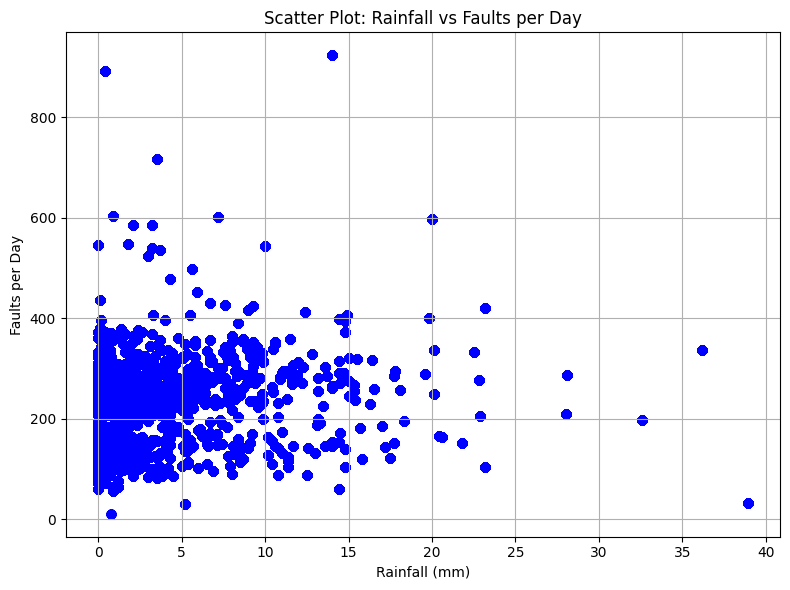

In [57]:
# Scatter plot for RAINFALL_MM against Faults_per_Day
plt.figure(figsize=(8, 6))
plt.scatter(df_data['RAINFALL_MM'], df_data['Faults_per_Day'], color='blue', alpha=0.5)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Faults per Day')
plt.title('Scatter Plot: Rainfall vs Faults per Day')
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


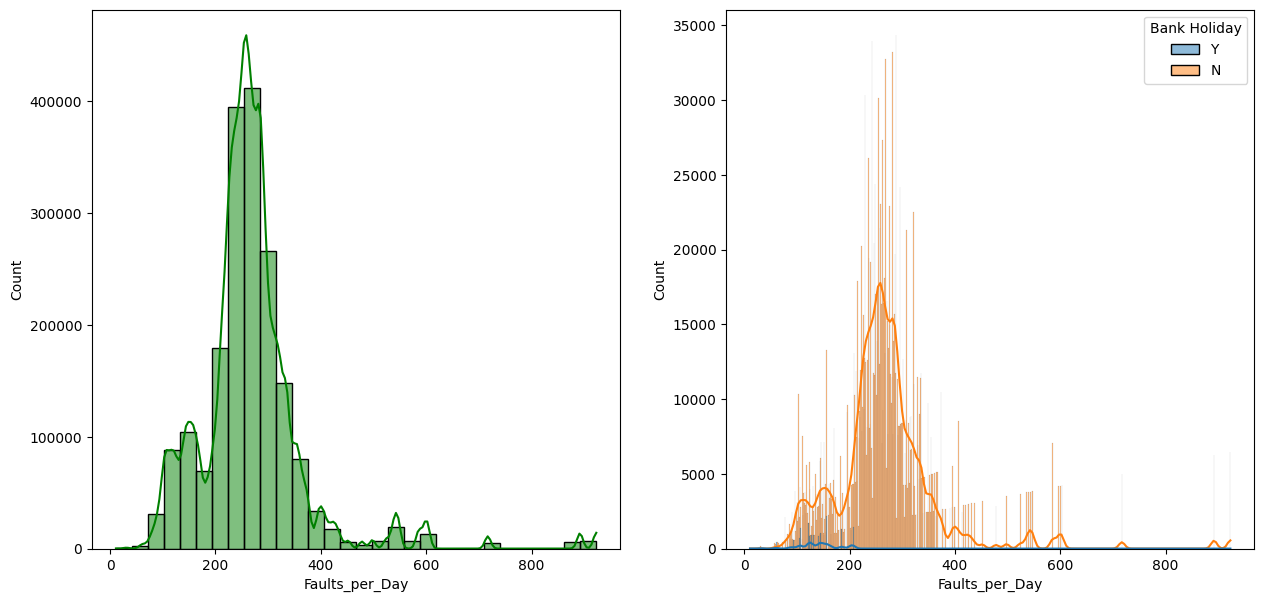

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_data,x='Faults_per_Day',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_data,x='Faults_per_Day',kde=True,hue='Bank Holiday')
plt.show()

In [59]:
df_data['Day of Week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

**when there is No bank holiday the cout of the faults are high so that means internate usage as are more on non bank holidays**

(-1.25, 1.25, -1.25, 1.25)

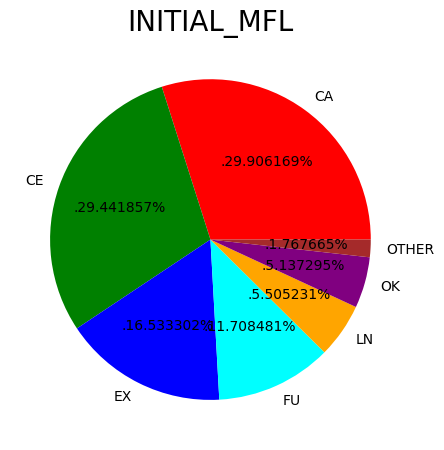

In [60]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 2)
size = df_data['INITIAL_MFL'].value_counts()
labels = 'CA', 'CE','EX','FU','LN','OK','OTHER'
color = ['red', 'green', 'blue', 'cyan','orange','purple','brown']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('INITIAL_MFL', fontsize = 20)
plt.axis('off')







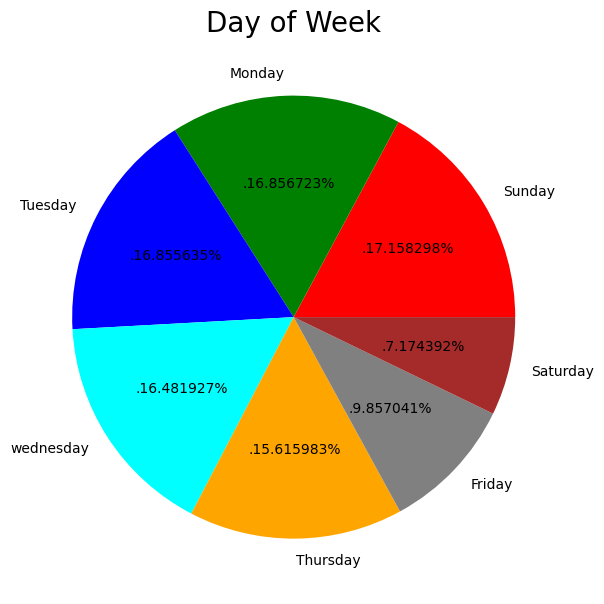

In [61]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 5)
size = df['Day of Week'].value_counts()
labels = 'Sunday', "Monday",'Tuesday','wednesday',"Thursday","Friday",'Saturday'
color = ['red', 'green', 'blue', 'cyan','orange','grey','brown']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Day of Week', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()



In [62]:
# Convert REPORT_DATE to datetime format
df_data['REPORT_DATE'] = pd.to_datetime(df_data['REPORT_DATE'])

# Extract year from REPORT_DATE
df_data['Year'] = df_data['REPORT_DATE'].dt.year

# Extract month from REPORT_DATE
df_data['Month'] = df_data['REPORT_DATE'].dt.month

# Group by Year and Month, and count faults
faults_per_month = df_data.groupby(['Year', 'Month']).size().reset_index(name='Faults_Count')



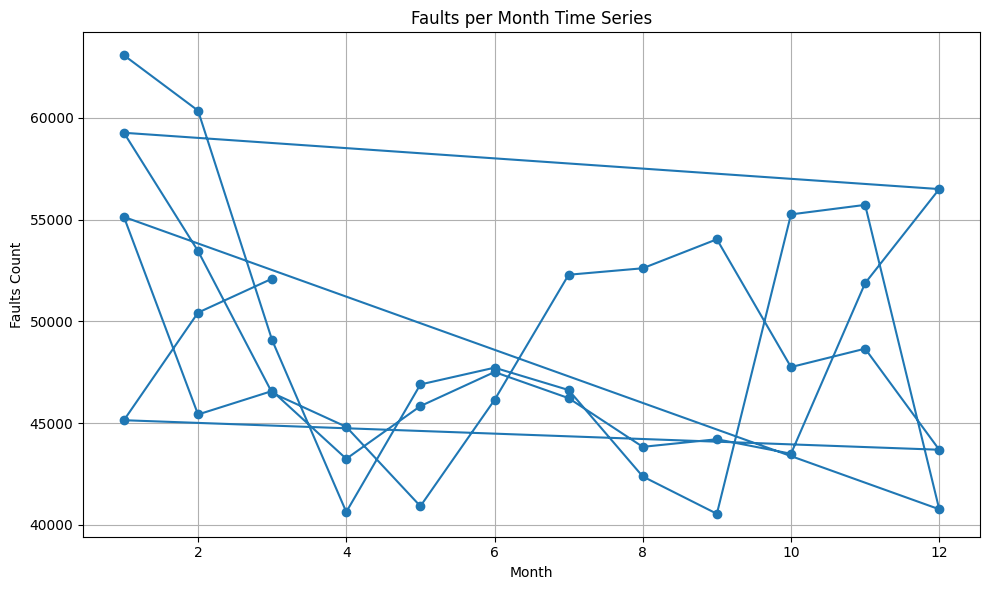

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated faults_per_month DataFrame as shown in the previous response

# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(faults_per_month['Month'], faults_per_month['Faults_Count'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Faults Count')
plt.title('Faults per Month Time Series')
plt.grid(True)
plt.tight_layout()
plt.show()

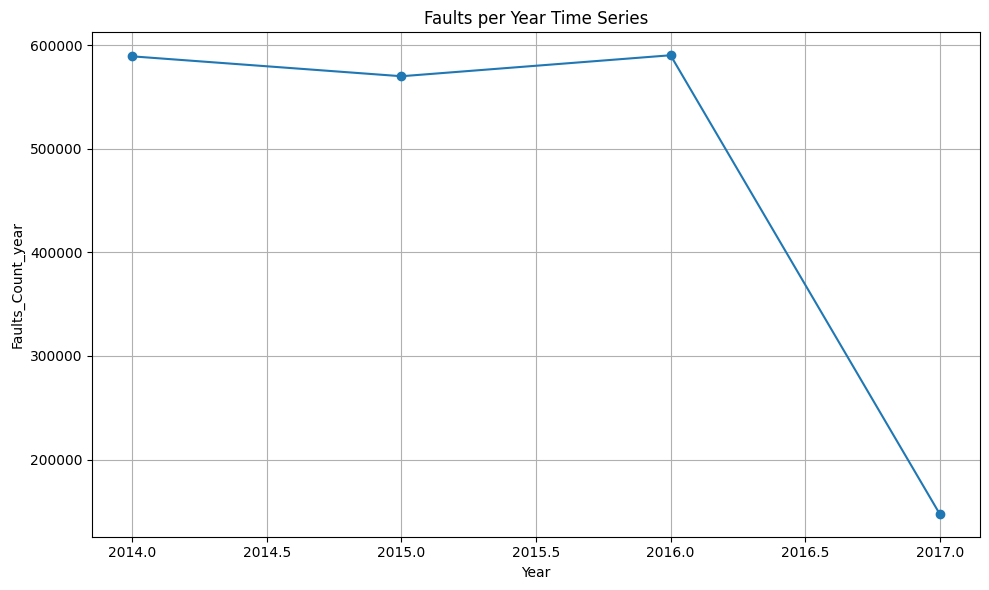

In [64]:
# Group by Year and Month, and count faults
faults_per_year = df_data.groupby('Year').size().reset_index(name='Faults_Count_year')

# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(faults_per_year['Year'], faults_per_year['Faults_Count_year'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Faults_Count_year')
plt.title('Faults per Year Time Series')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Grouping data by year and calculating total rainfall and number of faults for each year
rainfall_per_year = df_data.groupby(df_data['REPORT_DATE'].dt.year)['RAINFALL_MM'].sum()
faults_per_year = df_data.groupby(df_data['REPORT_DATE'].dt.year).size()

# Finding the year with the highest rainfall and the highest number of faults
year_with_max_rainfall = rainfall_per_year.idxmax()
year_with_max_faults = faults_per_year.idxmax()

print("Year with the highest rainfall:", year_with_max_rainfall)
print("Year with the highest number of faults:", year_with_max_faults)

Year with the highest rainfall: 2015
Year with the highest number of faults: 2016


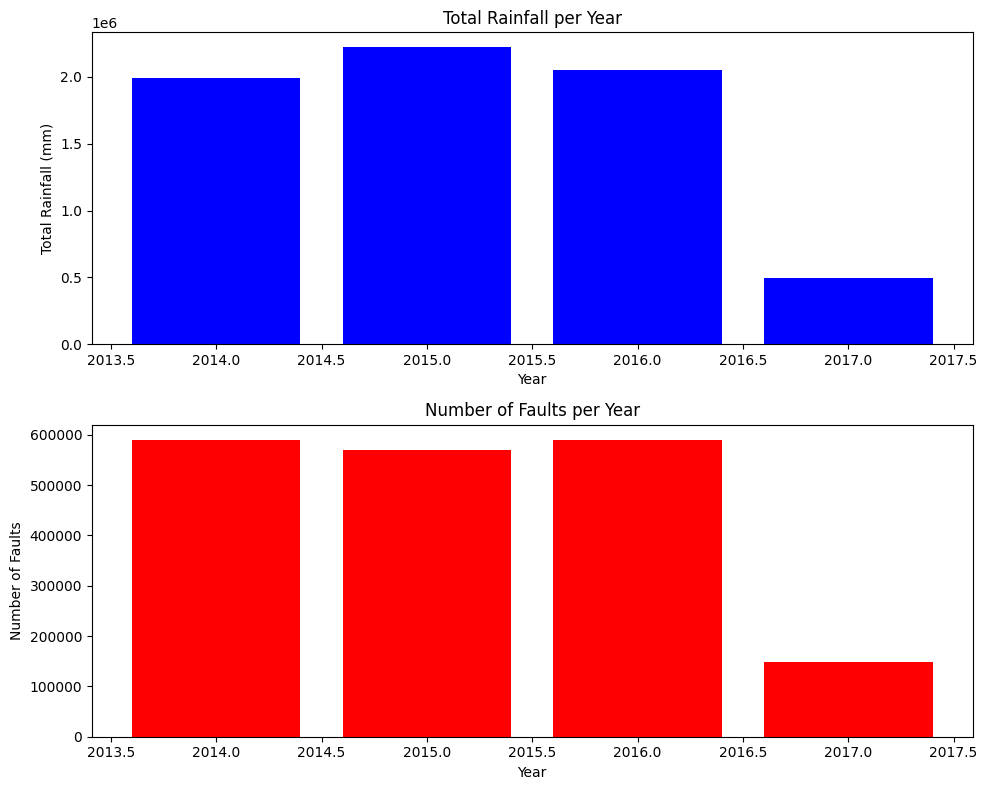

In [66]:
import matplotlib.pyplot as plt

# Grouping data by year and calculating total rainfall and number of faults for each year
rainfall_per_year = df_data.groupby(df_data['REPORT_DATE'].dt.year)['RAINFALL_MM'].sum()
faults_per_year = df_data.groupby(df_data['REPORT_DATE'].dt.year).size()

# Plotting bar plots for rainfall and faults per year
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting total rainfall per year
axs[0].bar(rainfall_per_year.index, rainfall_per_year.values, color='blue')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total Rainfall (mm)')
axs[0].set_title('Total Rainfall per Year')

# Plotting number of faults per year
axs[1].bar(faults_per_year.index, faults_per_year.values, color='red')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Faults')
axs[1].set_title('Number of Faults per Year')

plt.tight_layout()
plt.show()

In [67]:
# Grouping data by year and fault category, and counting occurrences
faults_per_year_category = df_data.groupby([df_data['REPORT_DATE'].dt.year, 'INITIAL_MFL']).size().unstack(fill_value=0)

# Finding the category with the highest count for each year
most_common_category_per_year = faults_per_year_category.idxmax(axis=1)

print("Category with the highest count for each year:")
print(most_common_category_per_year)

Category with the highest count for each year:
REPORT_DATE
2014    CE
2015    CE
2016    OK
2017    CE
dtype: object


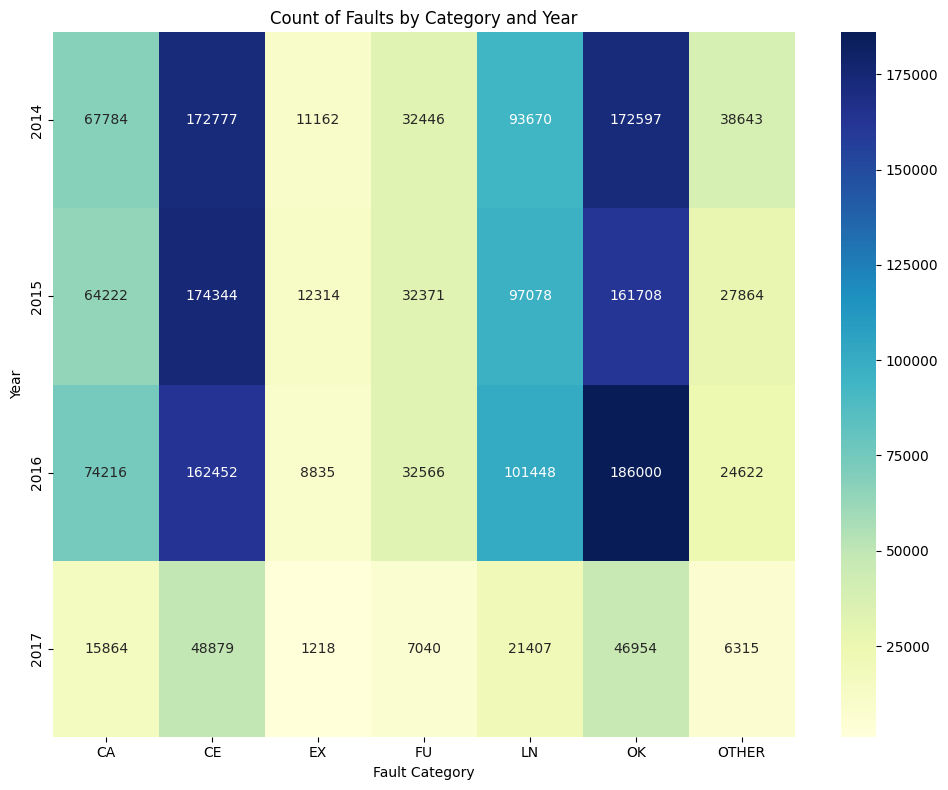

In [68]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(faults_per_year_category, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Fault Category')
plt.ylabel('Year')
plt.title('Count of Faults by Category and Year')
plt.tight_layout()
plt.show()

In [69]:
# Finding the category with the highest count for each year
least_common_category_per_year = faults_per_year_category.idxmin(axis=1)

print("Category with the lowest count for each year:")
print(least_common_category_per_year)

Category with the lowest count for each year:
REPORT_DATE
2014    EX
2015    EX
2016    EX
2017    EX
dtype: object


In [70]:
# Grouping data by month and calculating total rainfall and number of faults for each month
rainfall_per_month = df_data.groupby(df_data['REPORT_DATE'].dt.month)['RAINFALL_MM'].sum()
faults_per_month = df_data.groupby(df_data['REPORT_DATE'].dt.month).size()

# Finding the month with the highest rainfall and the highest number of faults reported
month_with_max_rainfall = rainfall_per_month.idxmax()
month_with_max_faults = faults_per_month.idxmax()

print("Month with the highest rainfall:", month_with_max_rainfall)
print("Month with the highest number of faults reported:", month_with_max_faults)

Month with the highest rainfall: 1
Month with the highest number of faults reported: 1


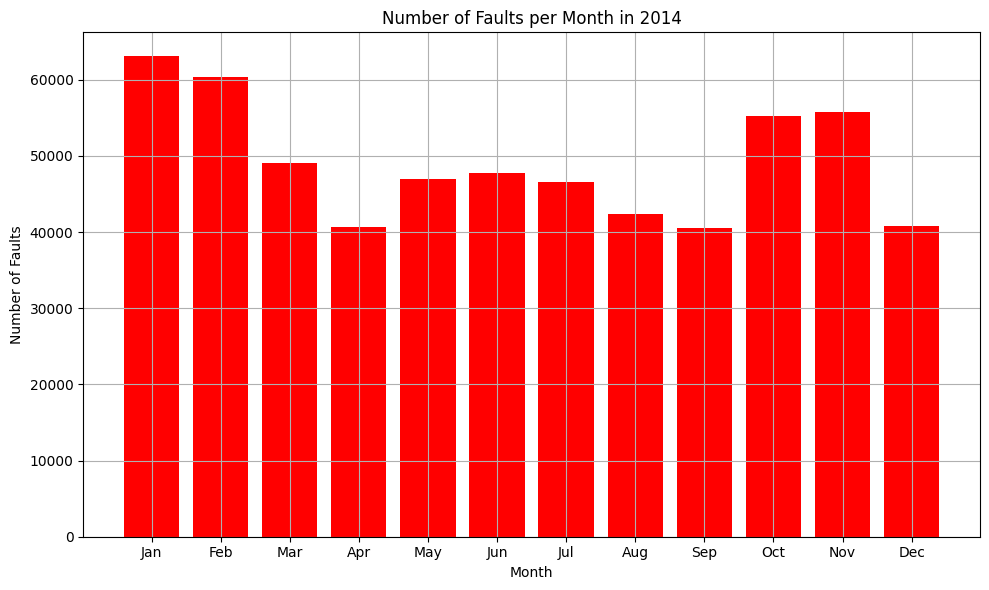

In [71]:
# Filter data for the year 2014
df_2014 = df_data[df_data['REPORT_DATE'].dt.year == 2014]
 # number of faults for each month in 2014
faults_per_month_2014 = df_2014.groupby(df_2014['REPORT_DATE'].dt.month).size()

# Plotting the number of faults per month in 2014
plt.figure(figsize=(10, 6))
plt.bar(faults_per_month_2014.index, faults_per_month_2014.values, color='red')
plt.xlabel('Month')
plt.ylabel('Number of Faults')
plt.title('Number of Faults per Month in 2014')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

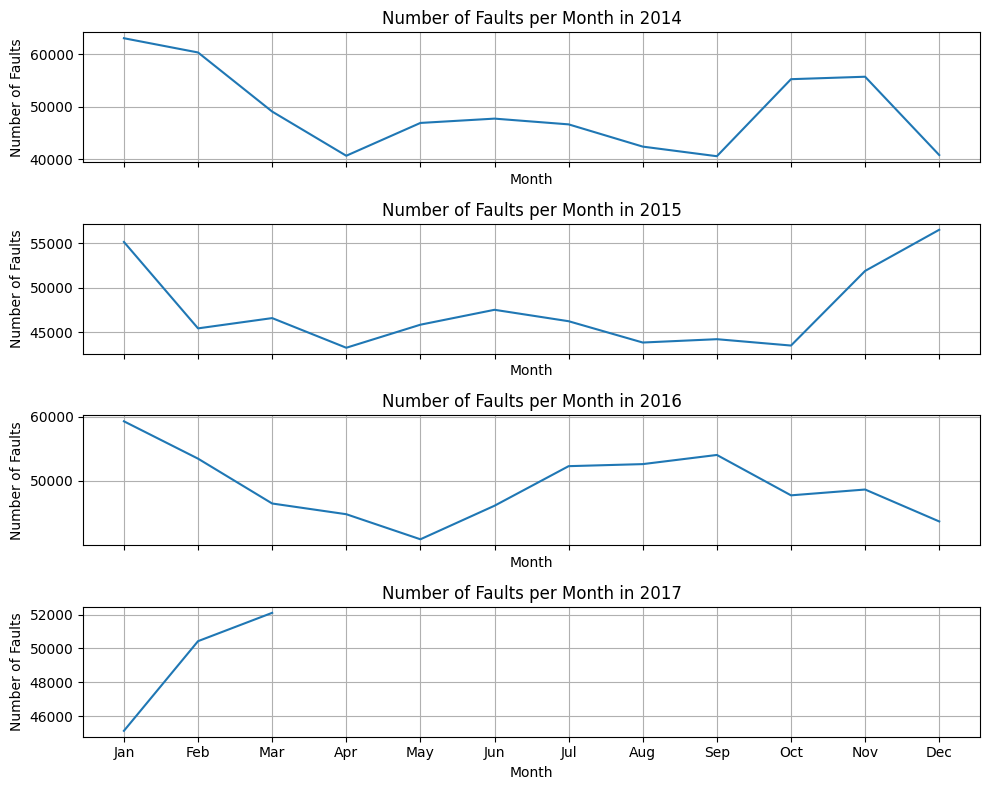

In [72]:
# Filter data for the years 2014, 2015, 2016, and 2017
df_years = df_data[df_data['REPORT_DATE'].dt.year.isin([2014, 2015, 2016, 2017])]

# Grouping data by year and month and calculating the number of faults for each month
faults_per_year_month = df_years.groupby([df_years['REPORT_DATE'].dt.year, df_years['REPORT_DATE'].dt.month]).size().unstack()

# Plotting the number of faults per month for each year in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
for i, year in enumerate(faults_per_year_month.index):
    axs[i].plot(faults_per_year_month.columns, faults_per_year_month.loc[year])
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Number of Faults')
    axs[i].set_title('Number of Faults per Month in {}'.format(year))
    axs[i].set_xticks(range(1, 13))
    axs[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axs[i].grid(True)

plt.tight_layout()
plt.show()

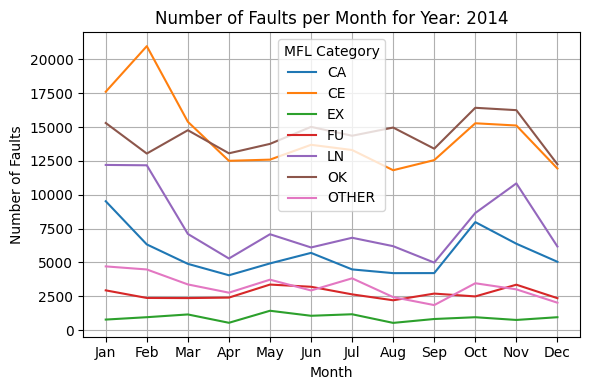

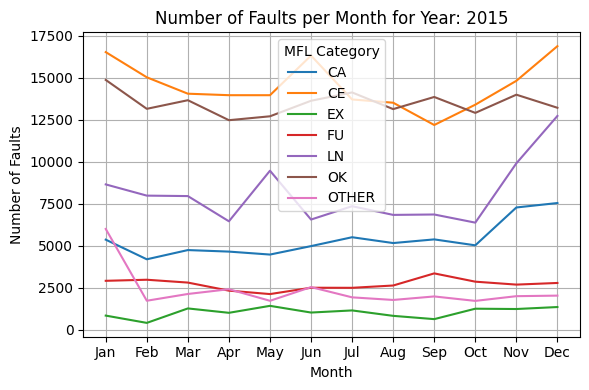

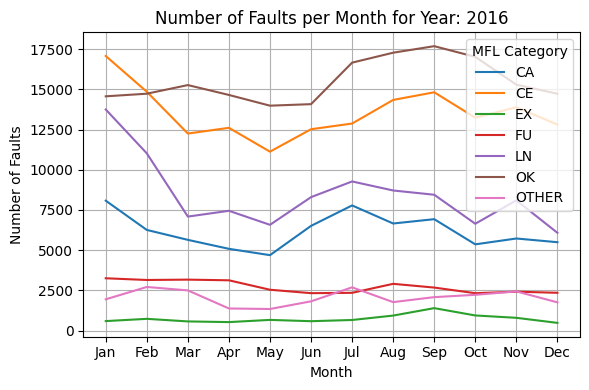

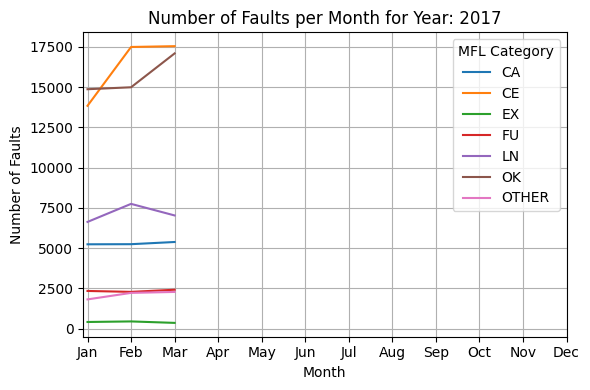

In [73]:
# Filter data for the relevant years
relevant_years = [2014, 2015, 2016, 2017]
df_relevant_years = df_data[df_data['REPORT_DATE'].dt.year.isin(relevant_years)]

# Group data by year, month, and MFL category and calculate the number of faults for each group
faults_per_year_month_mfl = df_relevant_years.groupby([df_relevant_years['REPORT_DATE'].dt.year, 
                                                       df_relevant_years['REPORT_DATE'].dt.month, 
                                                       'INITIAL_MFL']).size().unstack()

# Plot a separate graph for each year
for year in relevant_years:
    plt.figure(figsize=(6, 4))
    for mfl_category in faults_per_year_month_mfl.columns:
        plt.plot(faults_per_year_month_mfl.loc[year][mfl_category], label=mfl_category)
    plt.xlabel('Month')
    plt.ylabel('Number of Faults')
    plt.title('Number of Faults per Month for Year: {}'.format(year))
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='MFL Category')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [74]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896796 entries, 0 to 1896795
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Fault ID             object        
 1   REPORT_DATE          datetime64[ns]
 2   INITIAL_MFL          object        
 3   RAINFALL_MM          float64       
 4   Day of Week          object        
 5   Day Num Cal Week     int64         
 6   Day Num Cal Month    int64         
 7   Day Num Cal Year     int64         
 8   Bank Holiday         object        
 9   Faults_per_Day       int64         
 10  Rainfall_1_day_ago   float64       
 11  Rainfall_3_days_ago  float64       
 12  Rainfall_5_days_ago  float64       
 13  Rainfall_7_days_ago  float64       
 14  MLF_count            int64         
 15  Year                 int32         
 16  Month                int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(5), object(4)
memory usage: 231.5+ MB


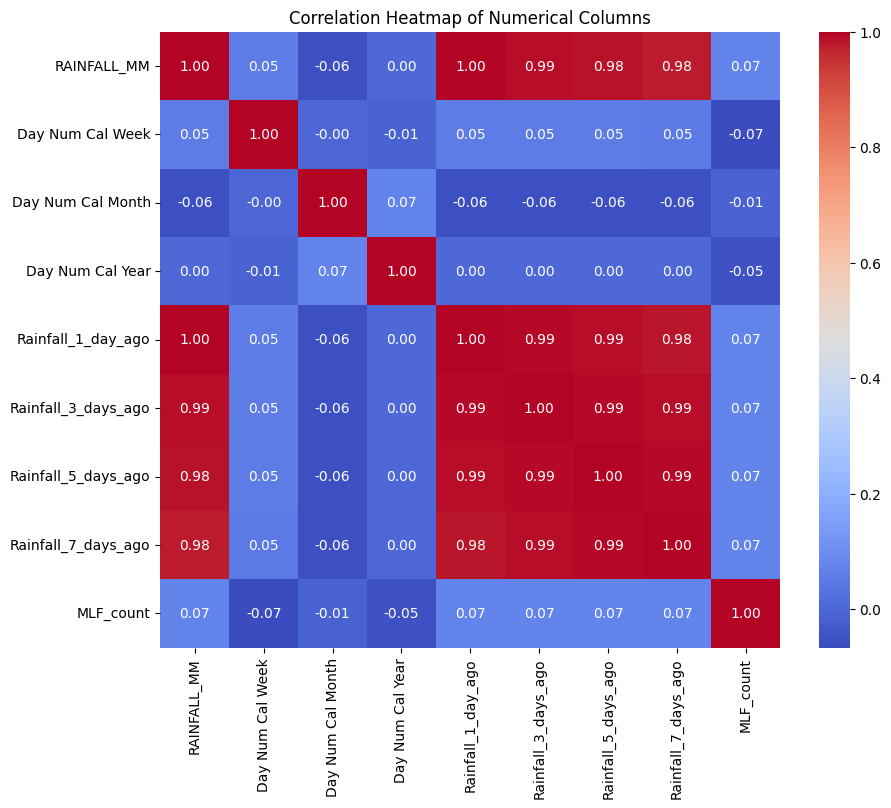

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Sample DataFrame
# Assuming your DataFrame is named df_data

# Select only numerical columns
numerical_columns = df_data.select_dtypes(include=['int64', 'float64'])
numerical_columns = numerical_columns.drop(columns=['Faults_per_Day'])

# Calculate Pearson correlation coefficient for numerical columns
corr_matrix = numerical_columns.corr()

# Plot correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()



In [76]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features = correlation(numerical_columns,0.90)
len(set(corr_features))

4

In [78]:
corr_features

{'Rainfall_1_day_ago',
 'Rainfall_3_days_ago',
 'Rainfall_5_days_ago',
 'Rainfall_7_days_ago'}

In [79]:
X = df_data.drop(columns=['Faults_per_Day'],axis=1)
y = df_data['Faults_per_Day']

In [80]:
X['year'] = X['REPORT_DATE'].dt.year
X['month'] = X['REPORT_DATE'].dt.month
X['day'] = X['REPORT_DATE'].dt.day

# Drop the original datetime column
X = X.drop(columns=['REPORT_DATE'])

In [81]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [82]:
X = preprocessor.fit_transform(X)
X.shape

(1896796, 275616)

In [83]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1517436, 275616), (379360, 275616))

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [100]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings

In [89]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3522
- Mean Absolute Error: 0.0884
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1408
- Mean Absolute Error: 0.1907
- R2 Score: 0.9999
Ridge
Model performance for Training set
- Root Mean Squared Error: 12.6647
- Mean Absolute Error: 7.4866
- R2 Score: 0.9840
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16.1913
- Mean Absolute Error: 9.3326
- R2 Score: 0.9742
Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7296
- Mean Absolute Error: 0.0029
- R2 Score: 0.9999
Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1530
- Mean Absolute Error: 0.0017
- R2 Score: 1.0000
-----------------

In [90]:
 pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
3  Random Forest Regressor  0.999987
2            Decision Tree  0.999948
0        Linear Regression  0.999872
5    CatBoosting Regressor  0.990930
4             XGBRegressor  0.984283
1                    Ridge  0.974180
6       AdaBoost Regressor  0.244047

In [91]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.99


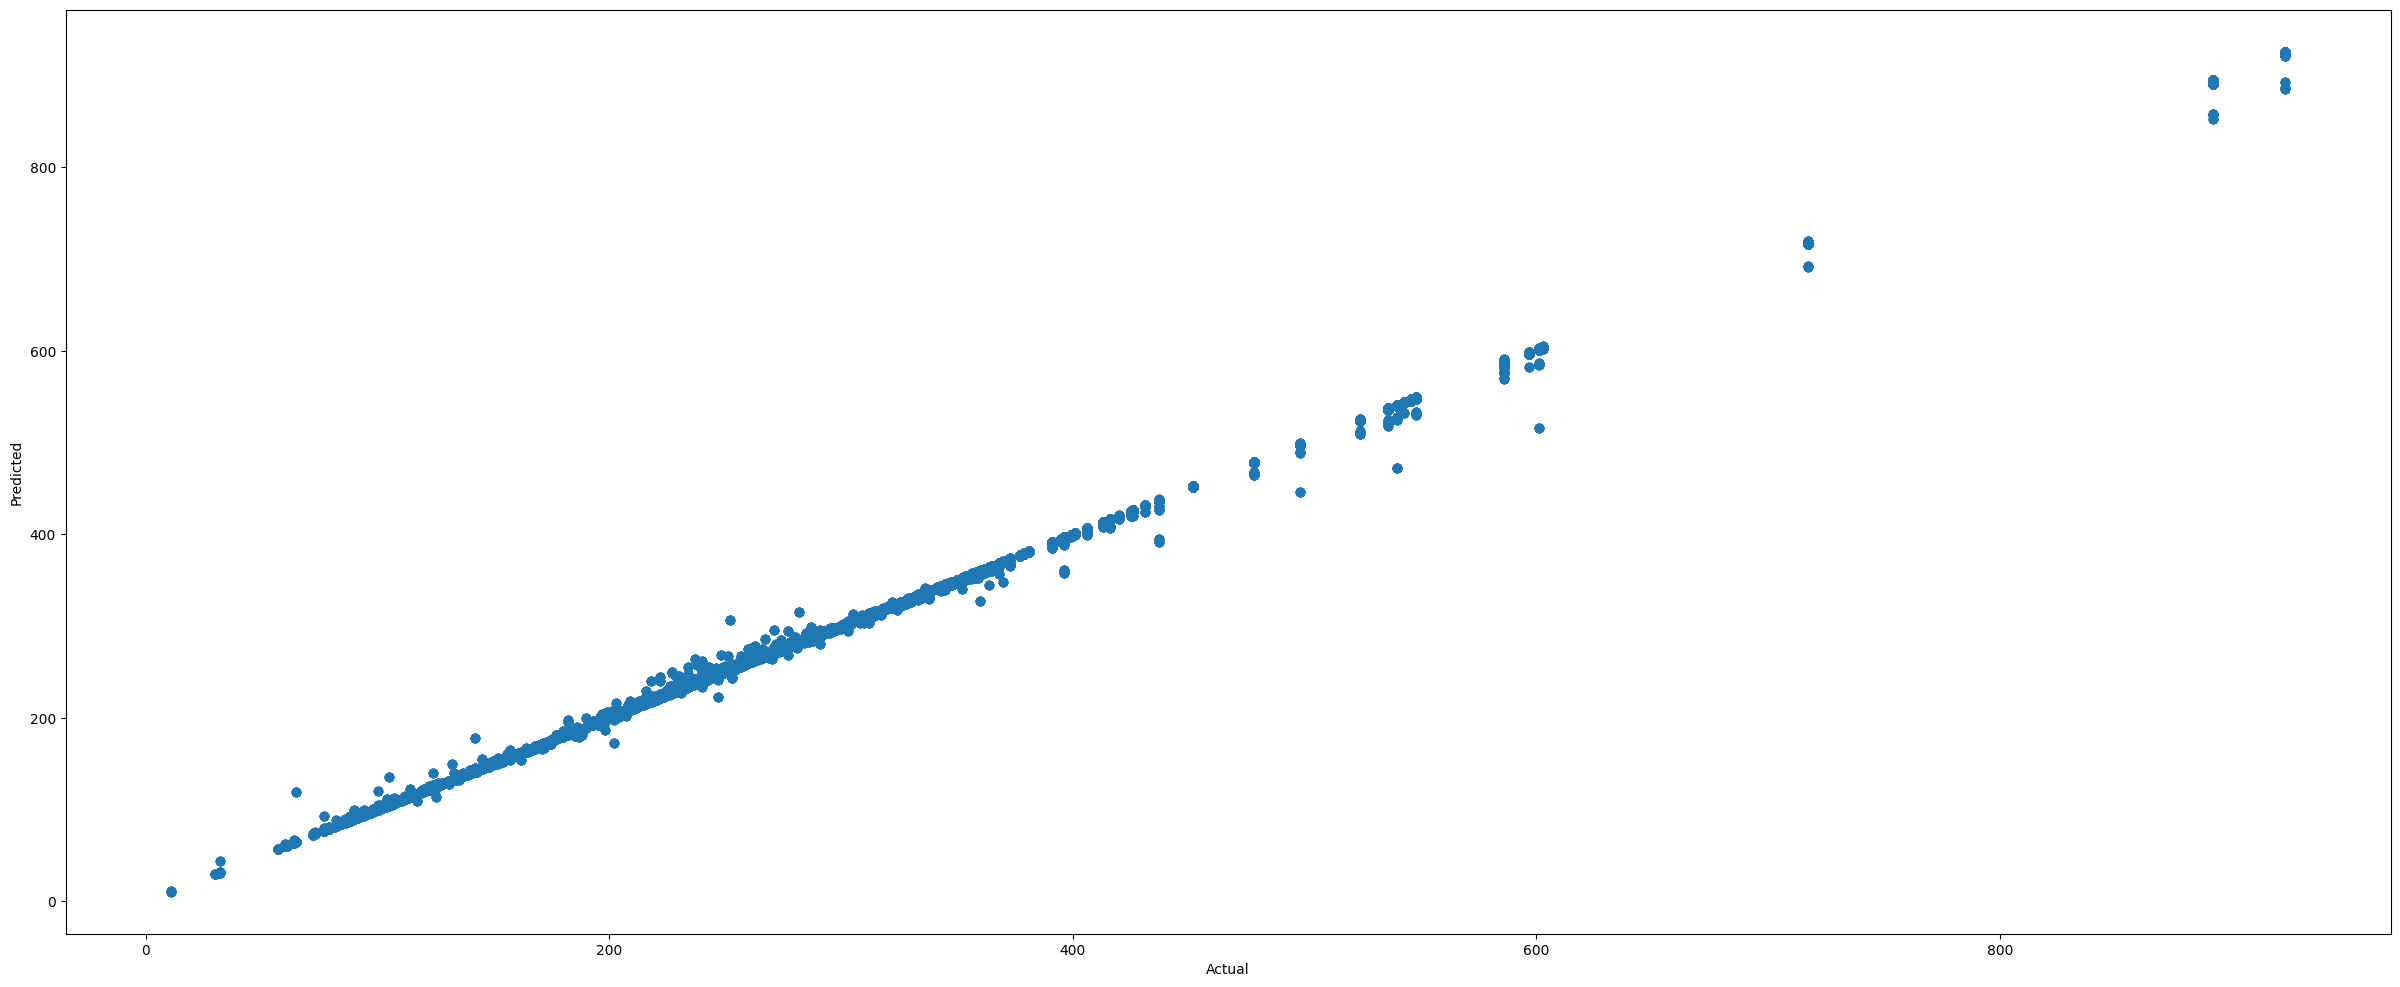

In [92]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

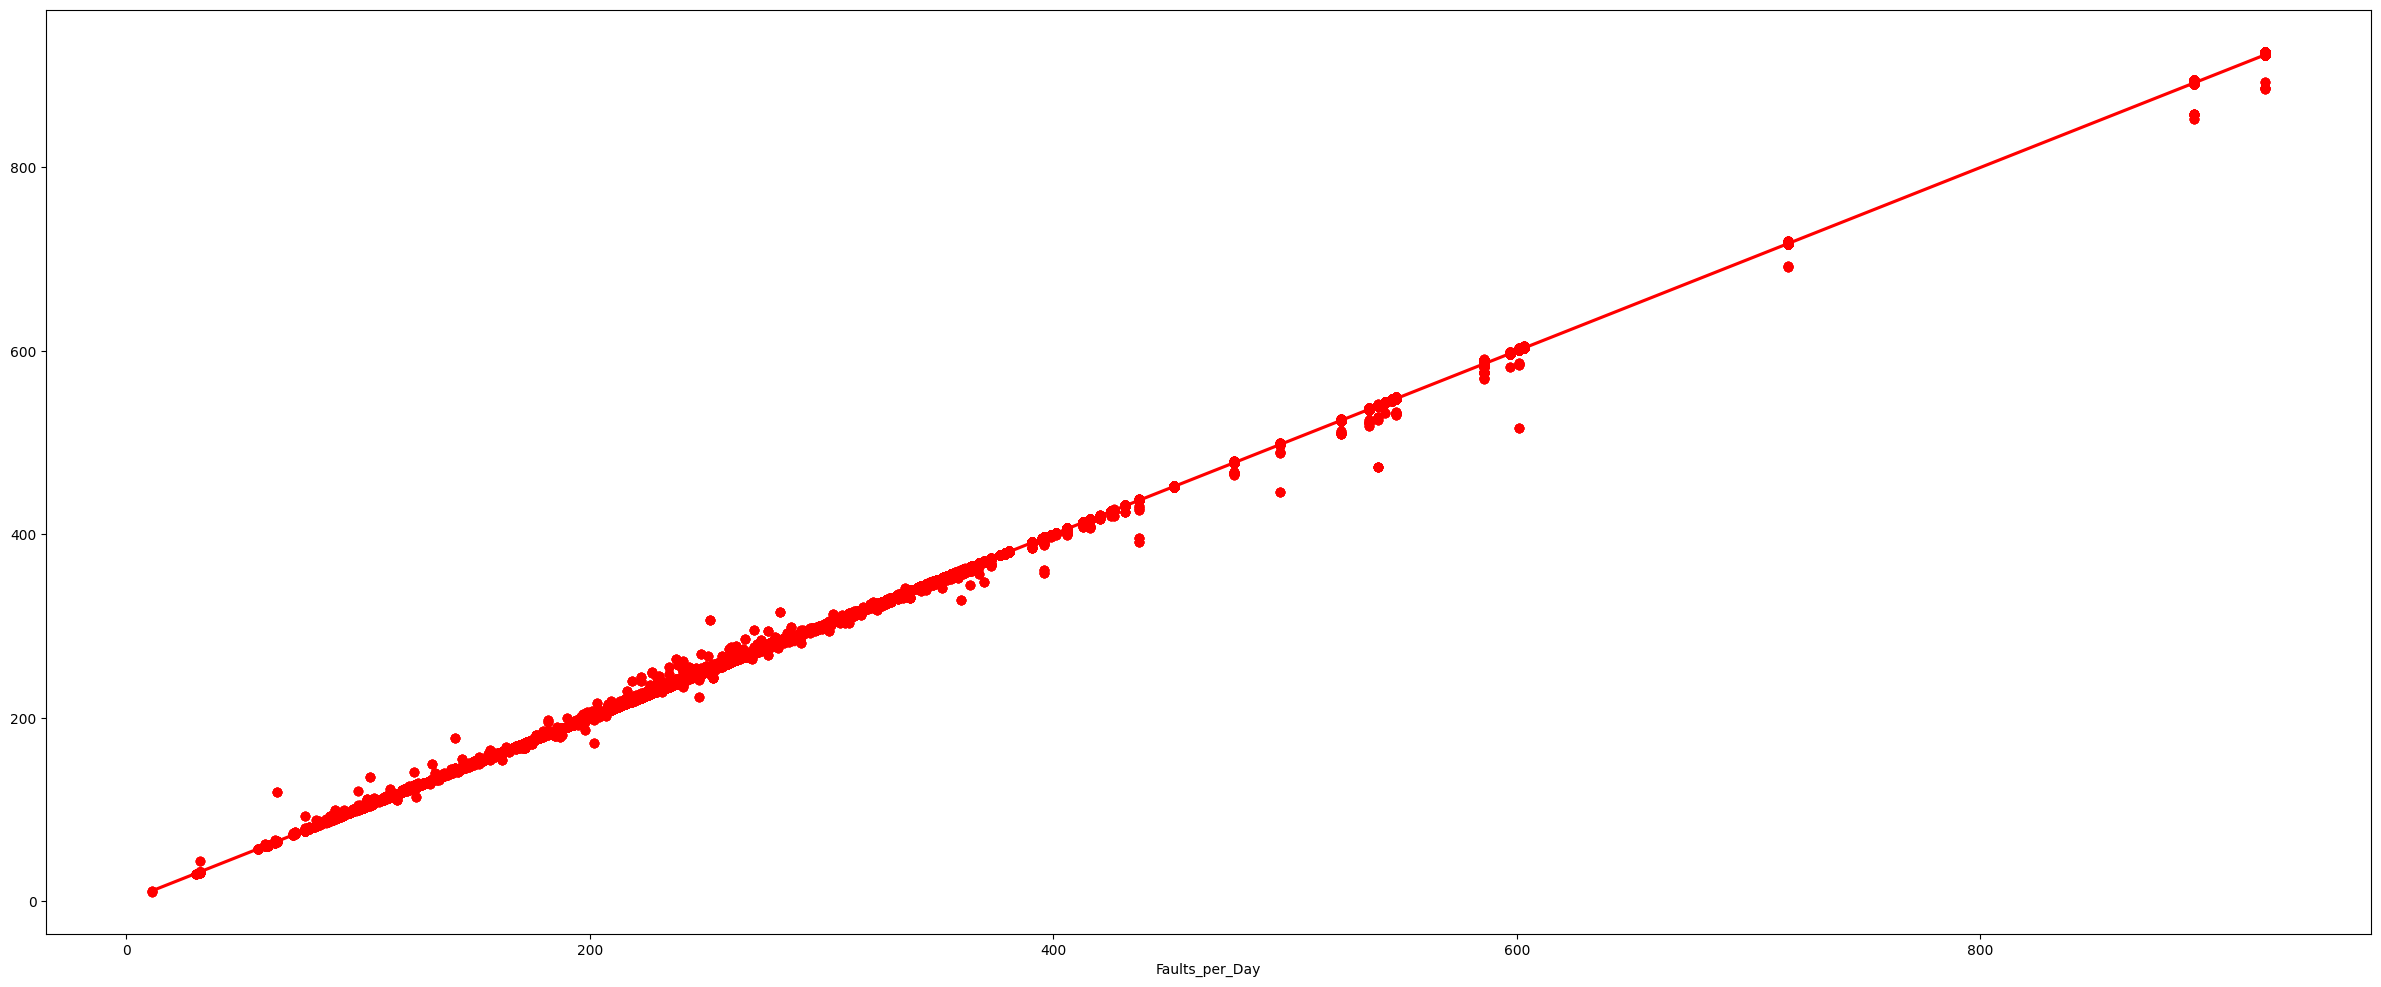

In [93]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [94]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Difference
1700011           289       288.986955    0.013045
1875172           164       163.994582    0.005418
199404             64        64.061588   -0.061588
196434            208       208.115021   -0.115021
1243583           104       104.042032   -0.042032
...               ...              ...         ...
943291            228       228.048316   -0.048316
189897            223       223.022794   -0.022794
1402378           237       237.114848   -0.114848
352538            246       246.068632   -0.068632
941169            246       246.108229   -0.108229

[379360 rows x 3 columns]

In [101]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    report = {}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        para=param[list(models.keys())[i]]
        gs = GridSearchCV(model,para,cv=3)
        gs.fit(X_train,y_train)
        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_model_score = r2_score(y_train, y_train_pred)
        test_model_score = r2_score(y_test, y_test_pred)
        report[list(models.keys())[i]] = test_model_score
    return report

In [102]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
            }
params={
    "Decision Tree":{
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    #'splitter':['best','random'],
    #'max_features':['sqrt','log2']
    },
    "Random Forest":{
     #'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
     #'max_features':'sqrt','log2','None']
    'n_estimators':[8,16,32,64,128,256]
    },
    "Gradient Boosting": {
    # 'loss':['squared_error','huber','absolute_error','quantile'],
    'learning_rate':[.1,.01,.05,.001],
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
    # 'criterion':['squared_error','friedman_mse'],
    # 'max_features':['auto','sqrt','log2'],
    'n_estimators':[8,16,32,64,128,256]
    },
     "Linear Regression":{ },
     "XGBRegressor": {
    'learning_rate':[.1,.01,.05,.001],
    'n_estimators':[8,16,32,64,128,256]
    },
    "CatBoosting Regressor":{
    'depth':[6,8,10],
    'learning_rate':[.1,.01,.05,.001],
     'iterations':[30,50,100]
    },
    "AdaBoost Regressor":{
    'learning_rate':[.1,.01,.05,.001],
    #'loss':['linear','square','exponential'],
    'n_estimators':[8,16,32,64,128,256]
    }

}

In [ ]:
model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,models=models,param=params)
## To get best model score from dict
best_model_score = max(sorted(model_report.values()))
## To get best model name from dict
best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)]
best_model = models[best_model_name]

           